# Bernoulli分布モデル

* 黒木玄
* 2020-02-11～2020-02-14, 2024-08-16

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#手計算のノート" data-toc-modified-id="手計算のノート-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>手計算のノート</a></span></li><li><span><a href="#共役事前分布" data-toc-modified-id="共役事前分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>共役事前分布</a></span></li><li><span><a href="#最尤法とベイズ法の予測分布" data-toc-modified-id="最尤法とベイズ法の予測分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>最尤法とベイズ法の予測分布</a></span></li><li><span><a href="#Kullback-Leibler情報量による予測誤差の定義" data-toc-modified-id="Kullback-Leibler情報量による予測誤差の定義-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kullback-Leibler情報量による予測誤差の定義</a></span></li><li><span><a href="#予測誤差の経験分布" data-toc-modified-id="予測誤差の経験分布-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>予測誤差の経験分布</a></span></li><li><span><a href="#平均予測誤差と平均二乗誤差" data-toc-modified-id="平均予測誤差と平均二乗誤差-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>平均予測誤差と平均二乗誤差</a></span></li><li><span><a href="#AICとWAICとLOOCV" data-toc-modified-id="AICとWAICとLOOCV-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>AICとWAICとLOOCV</a></span><ul class="toc-item"><li><span><a href="#平均AICと平均WAICと平均LOOCVと平均汎化誤差の関係" data-toc-modified-id="平均AICと平均WAICと平均LOOCVと平均汎化誤差の関係-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>平均AICと平均WAICと平均LOOCVと平均汎化誤差の関係</a></span></li><li><span><a href="#AICとWAICとLOOCVと予測誤差の関係" data-toc-modified-id="AICとWAICとLOOCVと予測誤差の関係-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>AICとWAICとLOOCVと予測誤差の関係</a></span></li><li><span><a href="#AICとWAICとLOOCVによって正しいモデル選択に失敗する確率" data-toc-modified-id="AICとWAICとLOOCVによって正しいモデル選択に失敗する確率-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>AICとWAICとLOOCVによって正しいモデル選択に失敗する確率</a></span></li></ul></li><li><span><a href="#BICとWBICと自由エネルギー" data-toc-modified-id="BICとWBICと自由エネルギー-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>BICとWBICと自由エネルギー</a></span><ul class="toc-item"><li><span><a href="#BICとWBICと自由エネルギーの関係" data-toc-modified-id="BICとWBICと自由エネルギーの関係-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>BICとWBICと自由エネルギーの関係</a></span></li><li><span><a href="#BICとWBICと自由エネルギーによって正しいモデル選択に失敗する確率" data-toc-modified-id="BICとWBICと自由エネルギーによって正しいモデル選択に失敗する確率-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>BICとWBICと自由エネルギーによって正しいモデル選択に失敗する確率</a></span></li></ul></li><li><span><a href="#ベイズ統計と仮説検定や信頼区間との関係" data-toc-modified-id="ベイズ統計と仮説検定や信頼区間との関係-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ベイズ統計と仮説検定や信頼区間との関係</a></span><ul class="toc-item"><li><span><a href="#P値函数およびその類似物の定義" data-toc-modified-id="P値函数およびその類似物の定義-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>P値函数およびその類似物の定義</a></span></li><li><span><a href="#P値函数のアニメーション" data-toc-modified-id="P値函数のアニメーション-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>P値函数のアニメーション</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"] = 200

using Distributions

using Plots
default(fmt=:png)
#pyplot(fmt=:svg)
pyplotclf() = if backend() == Plots.PyPlotBackend(); PyPlot.clf(); end

using Base64
displayfile(mime, file; tag="img") = open(file) do f
    display("text/html", """<$tag src="data:$mime;base64,$(base64encode(f))"/>""")
end

using Printf
using Roots
using SpecialFunctions

rd(x, digits=3) = round(x; digits=digits)
safemul(x, y) = iszero(x) ? x : x*y
safexlogy(x, y) = iszero(x) ? x : x*log(y)

safexlogy (generic function with 1 method)

## 手計算のノート

以下の手書きのノートで間違っていたとしても, コードの方では直っている可能性がある.


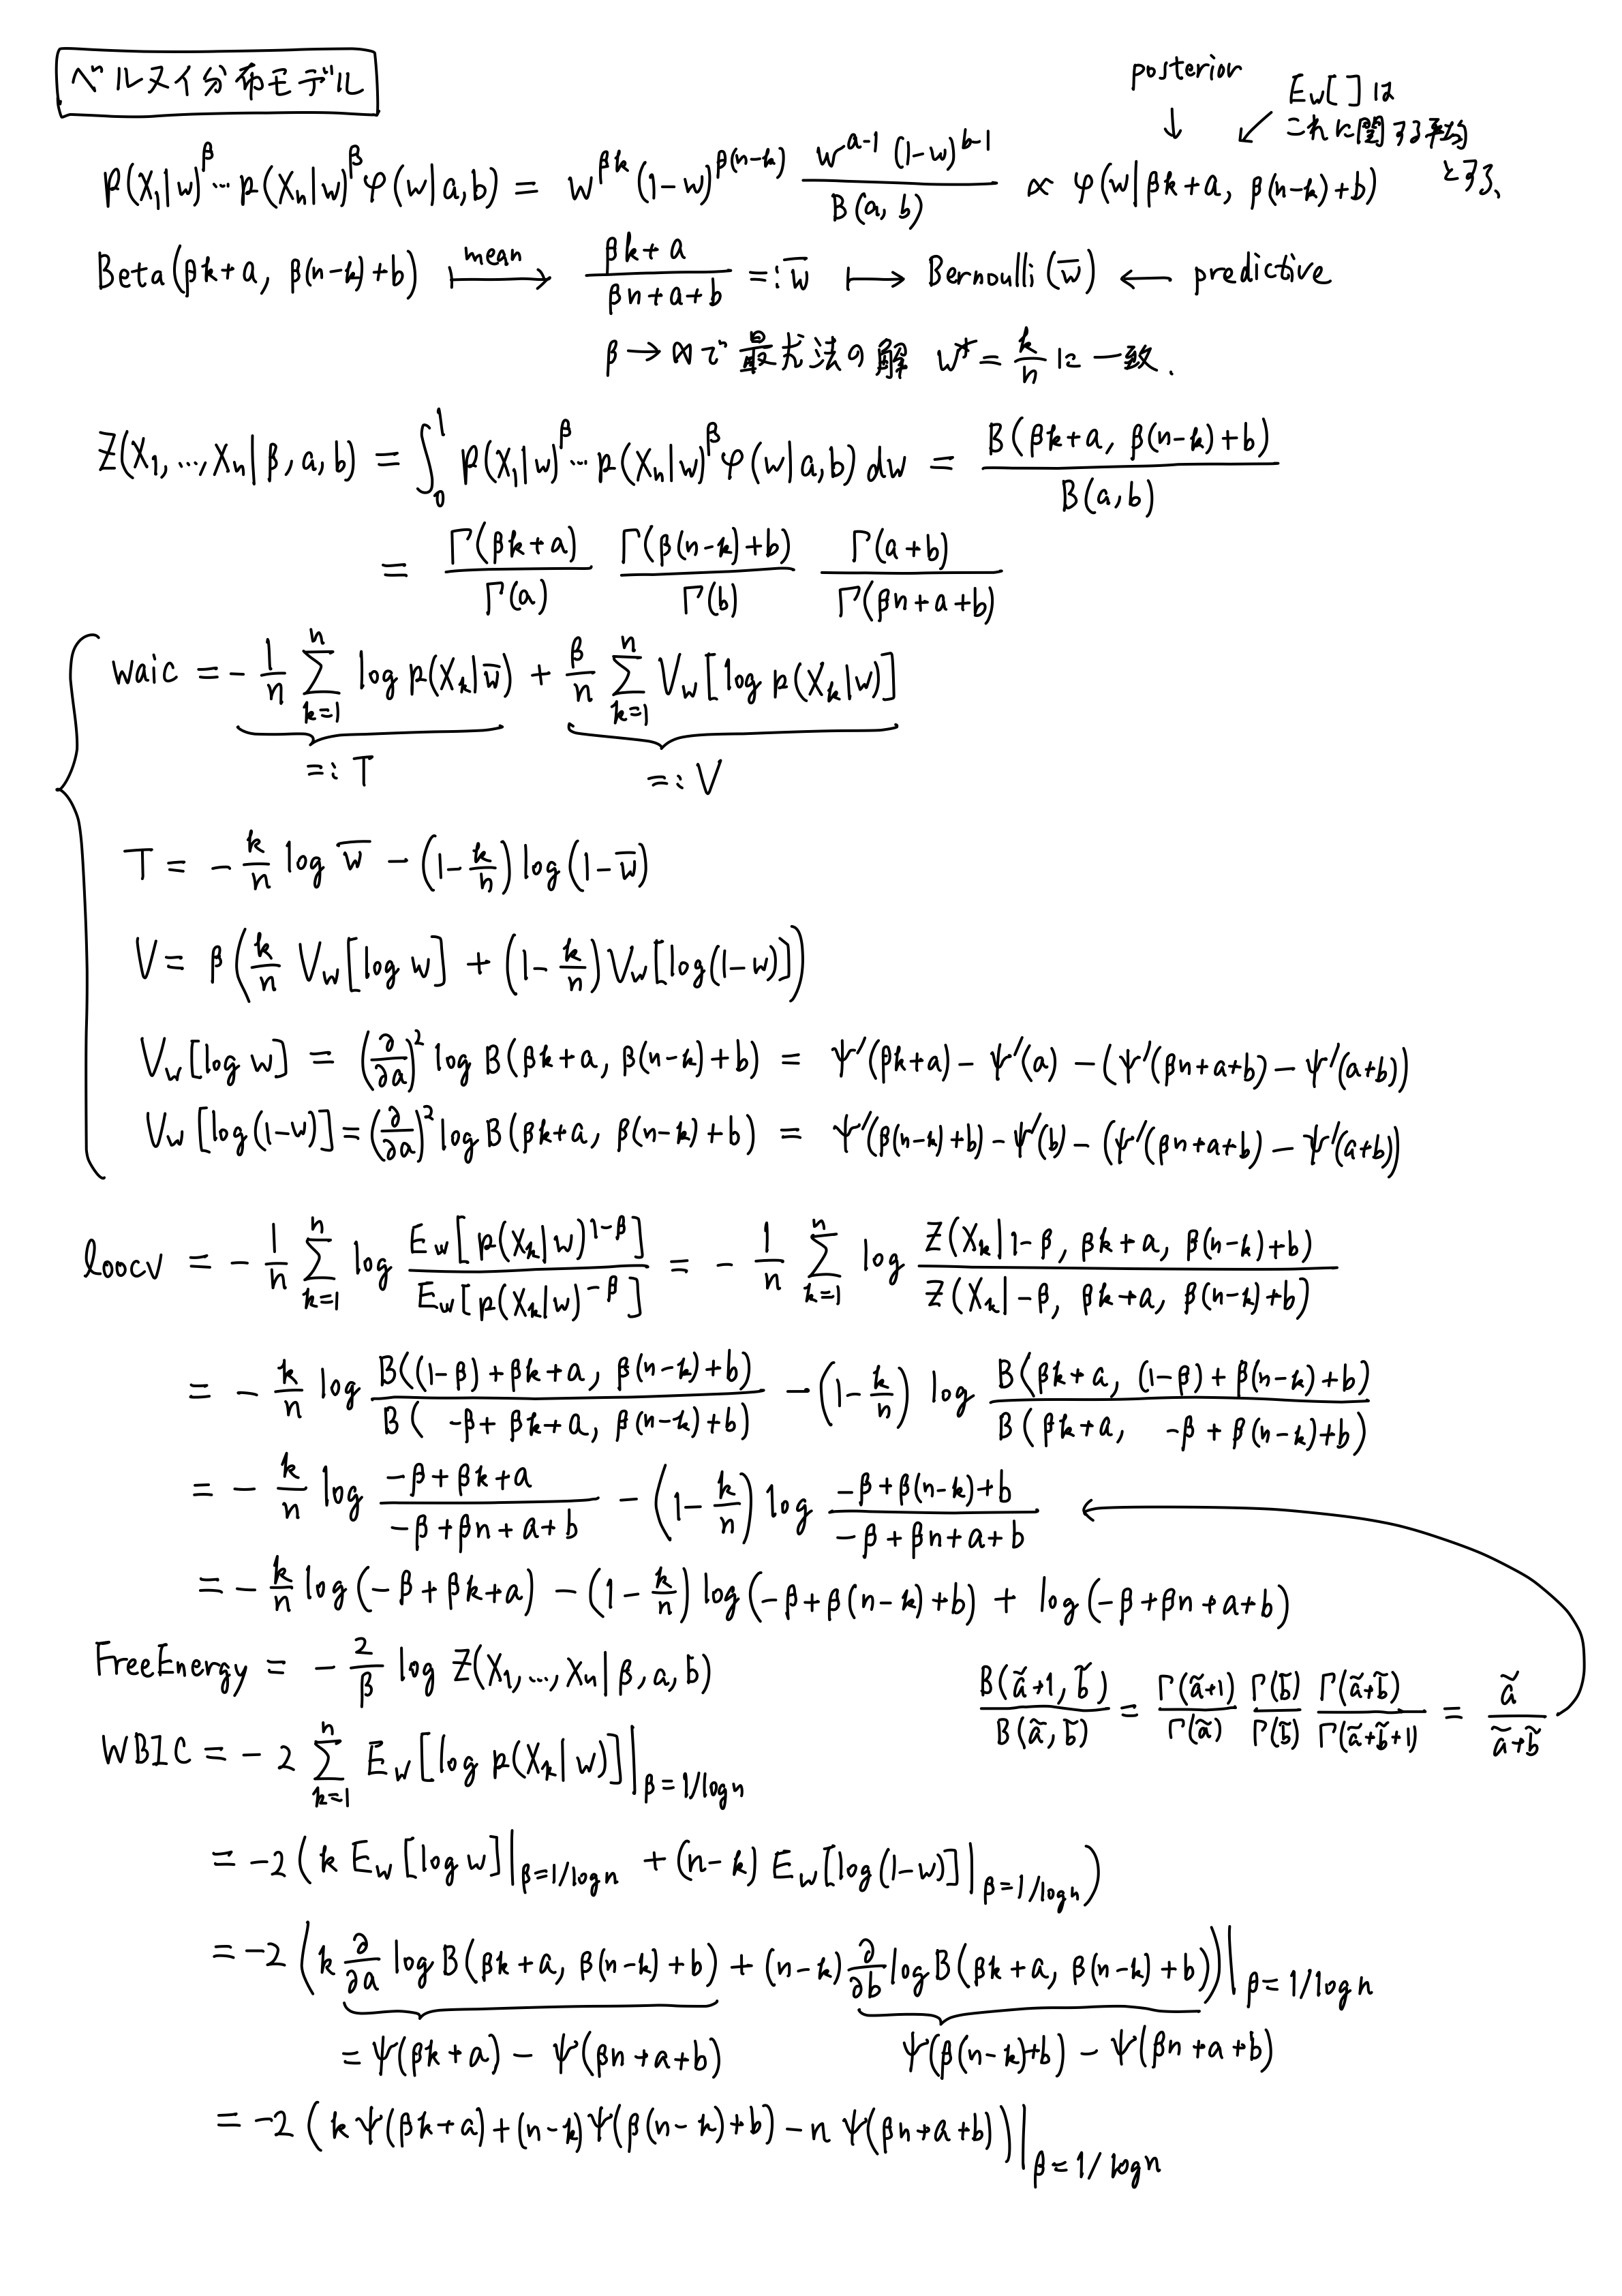

In [2]:
displayfile("image/png", "Bernoulli model.png")

## 共役事前分布

In [3]:
# mean(Beta(a, b)) → a/(a+b)
mean(Beta(3, 7))

0.3

In [4]:
# lim_{b→0} mean(a, b) = a/a = 1
mean(Beta(1, 1e-8)), mean(Beta(2, 1e-8))

(0.9999999900000002, 0.999999995)

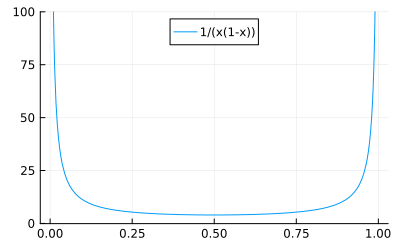

In [5]:
# the improper "Beta(0, 0)" distribution
plot(x -> 1/(x*(1-x)), 0, 1;
    ylim=(-0.1, 100), label="1/(x(1-x))", size=(400, 250), legend=:top)

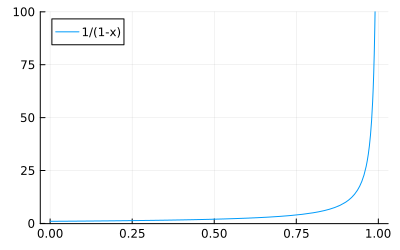

In [6]:
# the improper "Beta(1, 0)" distribution
plot(x -> 1/(1-x), 0, 1; ylim=(-0.1, 100), label="1/(1-x)", size=(400, 250))

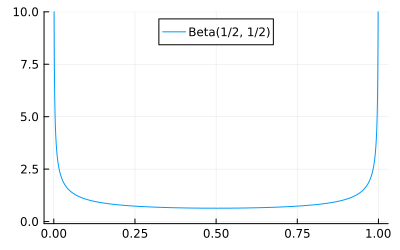

In [7]:
# Jeffreys' prior
plot(x -> pdf(Beta(1/2, 1/2), x), 0, 1;
    ylim=(-0.1, 10), label="Beta(1/2, 1/2)", size=(400, 250), legend=:top)

## 最尤法とベイズ法の予測分布

In [8]:
pred_MLE(n, k) = Bernoulli(k/n) # the predictive distribution of maximum likelihood estimation 
pred_Bayes(n, k; β=1.0, a=0.5, b=0.5) = Bernoulli((β*k+a)/(β*n+a+b)) # a=b=0.5 for the Jeffreys prior

n = 10
@show [pred_MLE(n, k).p   |> rd for k in 0:n]
@show [pred_Bayes(n, k).p |> rd for k in 0:n]
@show [pred_Bayes(n, k; a=1.0, b=1.0).p |> rd for k in 0:n]
@show [pred_Bayes(n, k; a=0.01, b=0.01).p |> rd for k in 0:n]
@show [pred_Bayes(n, k; β=0.0).p |> rd for k in 0:n]
@show [pred_Bayes(n, k; β=1e8).p |> rd for k in 0:n]
;

[(pred_MLE(n, k)).p |> rd for k = 0:n] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[(pred_Bayes(n, k)).p |> rd for k = 0:n] = [0.045, 0.136, 0.227, 0.318, 0.409, 0.5, 0.591, 0.682, 0.773, 0.864, 0.955]
[(pred_Bayes(n, k; a = 1.0, b = 1.0)).p |> rd for k = 0:n] = [0.083, 0.167, 0.25, 0.333, 0.417, 0.5, 0.583, 0.667, 0.75, 0.833, 0.917]
[(pred_Bayes(n, k; a = 0.01, b = 0.01)).p |> rd for k = 0:n] = [0.001, 0.101, 0.201, 0.3, 0.4, 0.5, 0.6, 0.7, 0.799, 0.899, 0.999]
[(pred_Bayes(n, k; β = 0.0)).p |> rd for k = 0:n] = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[(pred_Bayes(n, k; β = 1.0e8)).p |> rd for k = 0:n] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


## Kullback-Leibler情報量による予測誤差の定義

In [9]:
G(q, p) = -sum(safemul(pdf(q, x), logpdf(p, x)) for x in support(q)) # generalization error (or loss)
S(q) = G(q, q) # Shannon's information
KL(q, p) = G(q, p) - S(q) # Kullback-Leibler information, or prediction error of simulation of q by p

[(p, KL(Bernoulli(0.3), Bernoulli(p))) for p in 0:0.1:1]

11-element Vector{Tuple{Float64, Float64}}:
 (0.0, Inf)
 (0.1, 0.15366358680379855)
 (0.2, 0.028167557595283332)
 (0.3, 0.0)
 (0.4, 0.02160085414354651)
 (0.5, 0.08228287850505178)
 (0.6, 0.1837868973868122)
 (0.7, 0.33891914415488134)
 (0.8, 0.5826853020432395)
 (0.9, 1.0325534177382862)
 (1.0, Inf)

## 予測誤差の経験分布

In [10]:
make_samples(q::Bernoulli, n, L) = rand(Binomial(n, q.p), L)
ecdf(sample, x) = mean(sample .≤ x)

function plot_esitmation_errors(true_prob, n; L=10^6, bin=0:0.02:0.3, β=1.0, a=0.5, b=0.5)
    q = Bernoulli(true_prob)
    sample = make_samples(q, n, L)
    p_MLE   = pred_MLE.(n, sample)
    p_Bayes = pred_Bayes.(n, sample; β=β, a=a, b=b)
    KL_MLE   = KL.(q, p_MLE)
    KL_Bayes = KL.(q, p_Bayes)
    @show true_prob
    @show n
    
    P1 = plot(title="normalized histogram", titlefontsize=8)
    histogram!(KL_MLE;   bin=bin, label="KL_MLE",   alpha=0.5, norm=true)
    histogram!(KL_Bayes; bin=bin, label="KL_Bayes(β=$(β), a=$a, b=$b)", alpha=0.2, norm=true)
    x = range(0.01maximum(bin), maximum(bin), length=400)
    plot!(x, 2n*pdf.(Chisq(1), 2n*x);    label="2n pdf(2nx|χ²(1))", ls=:dot, color=:black)

    P2 = plot(title="empirical cumulative distribution function", titlefontsize=8)
    plot!(x, ecdf.(Ref(KL_MLE),   x); label="KL_MLE")
    plot!(x, ecdf.(Ref(KL_Bayes), x); label="KL_Bayes(β=$(β), a=$a, b=$b)", ls=:dash)
    x = range(extrema(bin)..., length=400)
    plot!(x, cdf.(Chisq(1), 2n*x);    label="cdf(2nx|χ²(1))", ls=:dot, color=:black)

    sleep(0.1)
    plot(P1, P2; size=(800, 250), layout=(1,2))
end

plot_esitmation_errors (generic function with 1 method)

true_prob = 0.3
n = 10


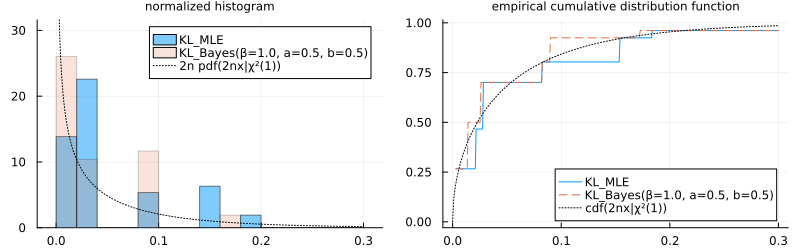

In [11]:
plot_esitmation_errors(0.3, 10)

true_prob = 0.3
n = 100


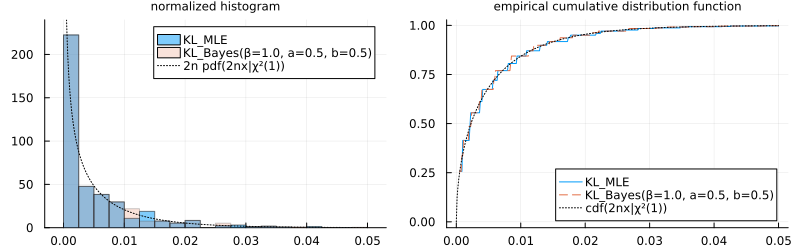

In [12]:
plot_esitmation_errors(0.3, 100; bin=0:0.0025:0.05)

## 平均予測誤差と平均二乗誤差

In [13]:
MSE(q, p) = sum((p.p - q.p)^2*pdf(q, k) for k in support(q)) # mean squared error

# expextation value
E(dist, f) = sum(f(x)*pdf(dist, x) for x in support(dist))

# expextation value (extremum cases eliminated)
function EE(dist, f)
    s = support(dist)
    sum(f(x)*pdf(dist, x) for x in s[2:end-1])/(1 - pdf(dist, s[1]) - pdf(dist, s[end]))
end

function print_estimation_errors(true_prob, n; β=1.0, a=0.5, b=0.5)
    q = Bernoulli(true_prob)
    q_sample = Binomial(n, q.p)
    f_KL_Bayes(x) = KL(q, pred_Bayes(n, x; β=β, a=a, b=b))
    f_KL_MLE(x) = KL(q, pred_MLE(n, x))
    f_MSE_Bayes(x) = MSE(q, pred_Bayes(n, x; β=β, a=a, b=b))
    f_MSE_MLE(x) = MSE(q, pred_MLE(n, x))

    @show true_prob
    @show n
    @show β
    @show a
    @show b
    println()
    @show E(q_sample, f_KL_Bayes)
    @show E(q_sample, f_KL_MLE)
    @show EE(q_sample, f_KL_Bayes)
    @show EE(q_sample, f_KL_MLE)
    println()
    @show E(q_sample, f_MSE_Bayes)
    @show E(q_sample, f_MSE_MLE)
    @show EE(q_sample, f_MSE_Bayes)
    @show EE(q_sample, f_MSE_MLE)
    nothing
end

print_estimation_errors (generic function with 1 method)

In [14]:
print_estimation_errors(0.3, 10)

true_prob = 0.3
n = 10
β = 1.0
a = 0.5
b = 0.5

E(q_sample, f_KL_Bayes) = 0.04771840476510404
E(q_sample, f_KL_MLE) = Inf
EE(q_sample, f_KL_Bayes) = 0.038950911970671895
EE(q_sample, f_KL_MLE) = 0.05017959517455097

E(q_sample, f_MSE_Bayes) = 0.01768595041322315
E(q_sample, f_MSE_MLE) = 0.021000000000000008
EE(q_sample, f_MSE_Bayes) = 0.01631409691736042
EE(q_sample, f_MSE_MLE) = 0.018991401589615826


In [15]:
print_estimation_errors(0.3, 100)

true_prob = 0.3
n = 100
β = 1.0
a = 0.5
b = 0.5

E(q_sample, f_KL_Bayes) = 0.004979051813238008
E(q_sample, f_KL_MLE) = Inf
EE(q_sample, f_KL_Bayes) = 0.0049790518132376916
EE(q_sample, f_KL_MLE) = 0.005112075811986018

E(q_sample, f_MSE_Bayes) = 0.0020625428879521546
E(q_sample, f_MSE_MLE) = 0.002099999999999993
EE(q_sample, f_MSE_Bayes) = 0.0020625428879521273
EE(q_sample, f_MSE_MLE) = 0.0020999999999999647


In [16]:
function plot_mean_estimation_errors(n; 
        legend_KL=:top, legend_MSE=:bottom, 
        β₁=1.0, a₁=0.5, b₁=0.5,
        β₂=1.0, a₂=1.0, b₂=1.0,
    )
    f_KL_MLE(true_prob, x)    = KL(Bernoulli(true_prob), pred_MLE(n, x))
    f_KL_BayesJ(true_prob, x) = KL(Bernoulli(true_prob), pred_Bayes(n, x; β=β₁, a=a₁, b=b₁))
    f_KL_Bayes(true_prob, x)  = KL(Bernoulli(true_prob), pred_Bayes(n, x; β=β₂, a=a₂, b=b₂))

    f_MSE_MLE(true_prob, x)    = MSE(Bernoulli(true_prob), pred_MLE(n, x))
    f_MSE_BayesJ(true_prob, x) = MSE(Bernoulli(true_prob), pred_Bayes(n, x; β=β₁, a=a₁, b=b₁))
    f_MSE_Bayes(true_prob, x)  = MSE(Bernoulli(true_prob), pred_Bayes(n, x; β=β₂, a=a₂, b=b₂))
    
    EE_KL_MLE(true_prob)    = EE(Binomial(n, true_prob), x->f_KL_MLE(true_prob, x))
    EE_KL_BayesJ(true_prob) = EE(Binomial(n, true_prob), x->f_KL_BayesJ(true_prob, x))
    EE_KL_Bayes(true_prob)  = EE(Binomial(n, true_prob), x->f_KL_Bayes(true_prob, x))

    E_MSE_MLE(true_prob)    = EE(Binomial(n, true_prob), x->f_MSE_MLE(true_prob, x))
    E_MSE_BayesJ(true_prob) = EE(Binomial(n, true_prob), x->f_MSE_BayesJ(true_prob, x))
    E_MSE_Bayes(true_prob)  = EE(Binomial(n, true_prob), x->f_MSE_Bayes(true_prob, x))

    true_prob = 0.01:0.01:0.99
    
    P1 = plot(title="mean prediction error (extremum cases eliminated)", titlefontsize=10)
    plot!(xlabel="true success probability", guidefontsize=9)
    plot!(xtick=0:0.1:1)
    plot!(legend=legend_KL, legendfontsize=7)
    plot!(true_prob, EE_KL_MLE.(true_prob);    label="MLE")
    plot!(true_prob, EE_KL_BayesJ.(true_prob); label="Bayes($β₁; $a₁, $b₁)", ls=:dash)
    plot!(true_prob, EE_KL_Bayes.(true_prob);  label="Bayes($β₂; $a₂, $b₂)", ls=:dashdot)
    
    P2 = plot(title="mean squared error (n = $n)", titlefontsize=10)
    plot!(xlabel="true success probability", guidefontsize=9)
    plot!(xtick=0:0.1:1)
    plot!(legend=legend_MSE, legendfontsize=7)
    plot!(true_prob, E_MSE_MLE.(true_prob);    label="MLE")
    plot!(true_prob, E_MSE_BayesJ.(true_prob); label="Bayes($β₁; $a₁, $b₁)", ls=:dash)
    plot!(true_prob, E_MSE_Bayes.(true_prob);  label="Bayes($β₂; $a₂, $b₂)", ls=:dashdot)
    
    plot(P1, P2; size=(800, 250), layout=(1,2))
end

plot_mean_estimation_errors (generic function with 1 method)

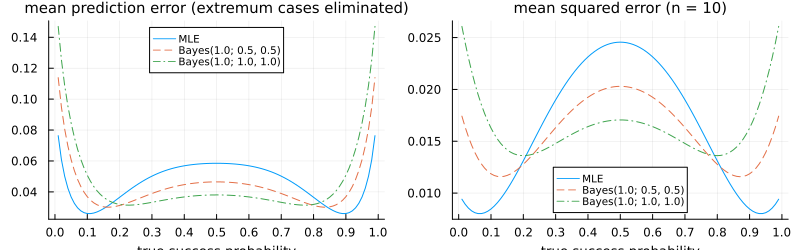

In [17]:
plot_mean_estimation_errors(10)

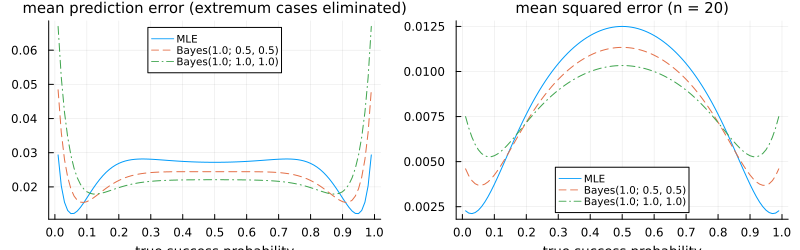

In [18]:
plot_mean_estimation_errors(20)

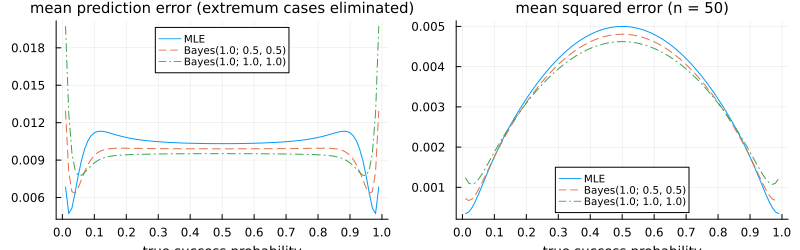

In [19]:
plot_mean_estimation_errors(50)

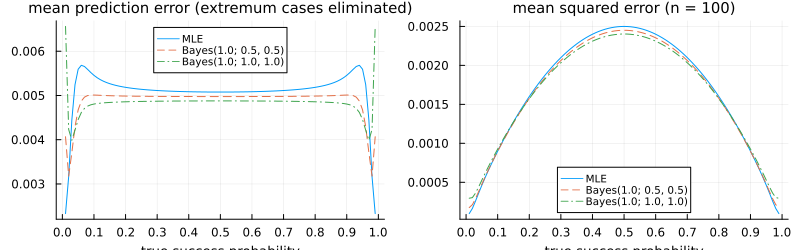

In [20]:
plot_mean_estimation_errors(100)

## AICとWAICとLOOCV

以下では, 渡辺澄夫著『ベイズ統計の理論と方法』におけるAICとWAICとLOOCV(1個抜き出し交差検証)の定義を aic, waic, loocv と書くことにする. それらの定義は伝統的なAICの定義の $2n$ 分の1になっている. 伝統的なスケールの側での AIC, WAIC, LOOCV を AIC, WAIC, LOOCV と書くことにする.

KL情報量で定義された予測誤差を pe (prediction error)と書き, その $2n$ 倍を PE と書くことにする. 予測分布の汎化誤差を ge と書き, その $2n$ 倍を GE と書くことにする.

In [21]:
# 予測分布の対数尤度の -1/n 倍
function T(n, k; β=1.0, a=0.5, b=0.5, w̄=(β*k+a)/(β*n+a+b))
    p = k/n
    -(safexlogy(p, w̄) + safexlogy(1-p, 1-w̄))
end

# 事後分布に関する log p(X_i|w) の分散のiに関する和の 1/n 倍
function V(n, k; β=1.0, a=0.5, b=0.5)
    p = k/n
    p*trigamma(β*k+a) + (1-p)*trigamma(β*(n-k)+b) - trigamma(β*n+a+b)
end

aic(n, k) = T(n, k; a=0.0, b=0.0) + 1/n
waic(n, k; β=1.0, a=0.5, b=0.5) = T(n, k; β=β, a=a, b=b) + β*V(n, k; β=β, a=a, b=b)
function loocv_old(n, k; β=1.0, a=0.5, b=0.5)
    p = k/n
    (
        -   p  *(logbeta((1-β)+β*k+a, β*(n-k)+b) - logbeta(-β+β*k+a, β*(n-k)+b))
        - (1-p)*(logbeta(β*k+a, (1-β)+β*(n-k)+b) - logbeta(β*k+a, -β+β*(n-k)+b))
    )
end
function loocv(n, k; β=1.0, a=0.5, b=0.5)
    p = k/n
    -safexlogy(p, -β+β*k+a) - safexlogy(1-p, -β+β*(n-k)+b) + log(-β+β*n+a+b)
end

AIC(n, k)  = 2n*aic(n, k)
WAIC(n, k; β=1.0, a=0.5, b=0.5) = 2n*waic(n, k; β=β, a=a, b=b)
LOOCV(n, k; β=1.0, a=0.5, b=0.5) = 2n*loocv(n, k; β=β, a=a, b=b)

# https://ja.wikipedia.org/wiki/%E8%B5%A4%E6%B1%A0%E6%83%85%E5%A0%B1%E9%87%8F%E8%A6%8F%E6%BA%96
# 
#    AICc = AIC + 2nparam(nparam + 1)/(samplesize - nparam - 1)
#
# nparam = 1,  samplesize = n
#
AICc(n, k) = AIC(n, k) + (2*1^2 + 2*1)/(n-1-1)

ge(pred_dist, q, n, k) = G(q, pred_dist(n, k))
pe(pred_dist, q, n, k) = KL(q, pred_dist(n, k))

GE(pred_dist, q, n, k) = 2n*ge(pred_dist, q, n, k)
PE(pred_dist, q, n, k) = 2n*pe(pred_dist, q, n, k)

aic0(q, n, k) = T(n, k; a=0.0, b=0.0, w̄=q.p)
waic0(q, n, k; β=1.0, a=0.5, b=0.5) = T(n, k; β=β, a=a, b=b, w̄=q.p)
loocv0(q, n, k; β=1.0, a=0.5, b=0.5) = waic0(q, n, k; β=β, a=a, b=b)

AIC0(q, n, k) = 2n*aic0(q, n, k)
WAIC0(q, n, k; β=1.0, a=0.5, b=0.5) = 2n*waic0(q, n, k; β=β, a=a, b=b)
LOOCV0(q, n, k; β=1.0, a=0.5, b=0.5) = 2n*loocv0(q, n, k; β=β, a=a, b=b)

function supp(dist, m=2)
    μ, σ = mean(dist), std(dist)
    a = max(minimum(dist), floor(Int, μ - m*σ))
    b = min(maximum(dist),  ceil(Int, μ + m*σ))
    a:b
end

sample_supp(q, n, m=2) = supp(Binomial(n, q.p), m)

E(q, n, f) = E(Binomial(n, q.p), f)
EE(q, n, f) = EE(Binomial(n, q.p), f)

EE (generic function with 2 methods)

In [22]:
loocv_old(10, 0) # error

LoadError: DomainError with (-0.5, 10.5):
`beta(a, b)` must be non-negative

In [23]:
loocv(10, 0)

0.05129329438755059

### 平均AICと平均WAICと平均LOOCVと平均汎化誤差の関係

$n$ を大きくすると、平均AICと平均WAICと平均LOOCVと平均汎化誤差はほぼ等しくなる. (ただし, ここで平均とはサンプルの標本分布に関する平均のことである.)

In [24]:
function plot_EEs_and_Es(n; f=[fill(true, 5); false], legend=:bottom)
    w = range(0.005, 0.995, step=0.005)
    q = Bernoulli.(w)
    EE_GE_MLE  = (q -> EE(q, n, k->GE(pred_MLE, q, n, k))).(q)
    EE_AIC     = (q -> EE(q, n, k->AIC(n, k))).(q)
    EE_AICc    = (q -> EE(q, n, k->AICc(n, k))).(q)
    E_GE_Bayes = (q -> E(q, n, k->GE(pred_Bayes, q, n, k))).(q)
    E_WAIC     = (q -> E(q, n, k->WAIC(n, k))).(q)
    E_LOOCV    = (q -> E(q, n, k->LOOCV(n, k))).(q)

    pal = palette(:default)
    P = plot(title="n = $n", titlefontsize=10)
    plot!(xlabel="w", ylabel="expectation value", xtick=0:0.1:1)
    f[1] && plot!(w, EE_GE_MLE;  label="EE[GE_MLE]",   ls=:dot,     color=pal[1])
    f[2] && plot!(w, EE_AIC;     label="EE[AIC]",      ls=:dash,    color=pal[2])
    f[3] && plot!(w, E_GE_Bayes; label="E[GE_Bayes]",  ls=:solid,   color=pal[3])
    f[4] && plot!(w, E_WAIC;     label="E[WAIC]",      ls=:dash,    color=pal[4])
    f[5] && plot!(w, E_LOOCV;    label="E[LOOCV]",     ls=:dashdot, color=pal[5])
    f[6] && plot!(w, EE_AICc;     label="EE[AICc]",    ls=:dash,    color=pal[6])
    
    plot(P; size=(400, 250), legend)
end

plot_EEs_and_Es (generic function with 1 method)

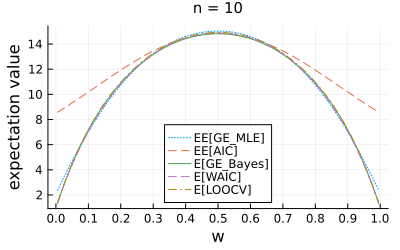

In [25]:
plot_EEs_and_Es(10)

$n$ が小さいとき, 平均AICの誤差は大きい.

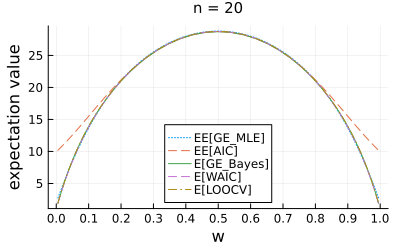

In [26]:
plot_EEs_and_Es(20)

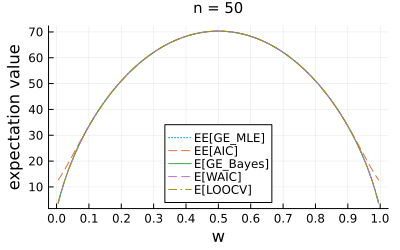

In [27]:
plot_EEs_and_Es(50)

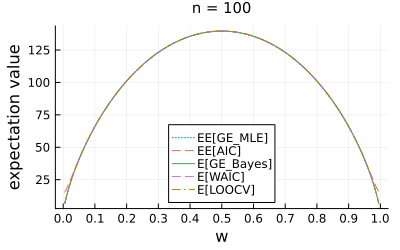

In [28]:
plot_EEs_and_Es(100)

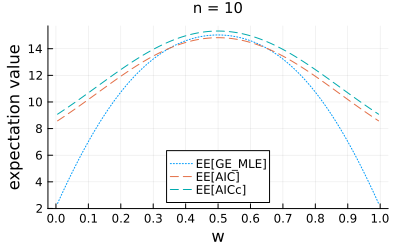

In [29]:
plot_EEs_and_Es(10; f=[true; true; fill(false, 3); true])

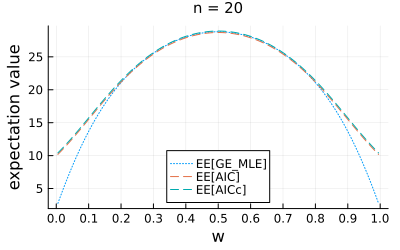

In [30]:
plot_EEs_and_Es(20; f=[true; true; fill(false, 3); true])

### AICとWAICとLOOCVと予測誤差の関係

渡辺澄夫『ベイズ推定の理論と方法』のp.80の12行目の公式(の両辺を $2n$ 倍したもの)とp.119の定理15(の公式の両辺を $2n$ 倍したもの)の数値的確認. 我々はパラメーターの個数が $d=1$ の場合の正則モデルを扱っているので, $\lambda=d/2$ となり, $\beta = 1$ のとき, 右辺を $2n$ 倍した結果は $n$ を大きくすると, $2d=4\lambda=2$ に近付くはずである.

In [31]:
function make_xtick(n, w)
    q = Bernoulli(w)
    q_sample = Binomial(n, q.p)
    
    t3 = round(Int, mean(q_sample))
    t2, t4 = extrema(sample_supp(q, n, 1))
    t1, t5 = extrema(sample_supp(q, n, 2))
    xticklabel = fill("", t5 - t1 + 1)
    xticklabel[1] = "$t1"
    xticklabel[t2-t1+1] = "$t2"
    xticklabel[t3-t1+1] = "$t3"
    xticklabel[t4-t1+1] = "$t4"
    xticklabel[end] = "$t5"
    tmp = cdf.(q_sample, t1-1:t5)
    xtick = @views @. (tmp[1:end-1] + tmp[2:end])/2
    
    xtick, xticklabel
end

function plot_AIC(n, w;
        legend = :top,
        ylim = (-4, 6),
        ytick = ylim[1]:ylim[2]
    )

    q = Bernoulli(w)
    q_sample = Binomial(n, q.p)

    x = range(0, 1, length=801)
    k = quantile.(q_sample, x)
    xtick, xticklabel = make_xtick(n, w)
    
    pred_error = @. PE(pred_MLE, q, n, k)
    AIC_minus_AIC0 = @. AIC(n,k) - AIC0(q,n,k)
    
    P = plot(title="n = $n,  w = $w"; titlefontsize=10)
    plot!(xlim=(0, 1), ylim=ylim)
    plot!(xtick=(xtick, xticklabel), ytick=ytick)
    plot!(xlabel="k", guidefontsize=10)
    plot!(legend=legend)
    plot!(x, pred_error; label="Prediction Error of MLE")
    plot!(x, AIC_minus_AIC0; label="AIC - AIC0", ls=:dash, lw=1.3)
    hline!([0]; color=:black, ls=:dot, alpha=0.8, label="")
    
    plot(P; size=(500, 350))
end

function plot_WAIC_LOOCV(n, w;
        legend = :top,
        ylim = (-4, 6),
        ytick = ylim[1]:ylim[2]
    )

    q = Bernoulli(w)
    q_sample = Binomial(n, w)

    x = range(0, 1, length=801)
    k = quantile.(q_sample, x)
    xtick, xticklabel = make_xtick(n, w)
    
    pred_error = @. PE(pred_Bayes, q, n, k)
    WAIC_minus_WAIC0 = @. WAIC(n,k) - WAIC0(q,n,k)
    LOOCV_minus_LOOCV0 = @. LOOCV(n,k) - LOOCV0(q,n,k)
    
    P = plot(title="n = $n,  w = $w"; titlefontsize=10)
    plot!(xlim=(0, 1), ylim=ylim)
    plot!(xtick=(xtick, xticklabel), ytick=ytick)
    plot!(xlabel="k", guidefontsize=10)
    plot!(legend=legend)
    plot!(x, pred_error; label="Prediction Error of Bayes")
    plot!(x, WAIC_minus_WAIC0; label="WAIC - WAIC0", ls=:dash, lw=1.3)
    plot!(x, LOOCV_minus_LOOCV0; label="LOOCV - LOOCV0", ls=:dot, lw=1.3)
    hline!([0]; color=:black, ls=:dot, alpha=0.8, label="")
    
    plot(P; size=(500, 350))
end

plot_WAIC_LOOCV (generic function with 1 method)

In [32]:
n = 10
w = 0.4
@show n
@show w
q = Bernoulli(w)
prob_fail_AIC = E(q, n, k->AIC(n,k) < AIC0(q,n,k)) |> rd
@show prob_fail_AIC
println()
for k in sample_supp(q, n, 3)
    pred_error = PE(pred_MLE, q, n, k)
    AIC_minus_AIC0 = AIC(n,k) - AIC0(q,n,k)
    (
        k = k,
        prob = pdf(Binomial(n, q.p), k)|>rd, 
        PE_MLE = pred_error |>rd, 
        AIC_minus_AIC0 = AIC_minus_AIC0 |>rd, 
        PE_plus_AIC_minus_AIC0 = pred_error + AIC_minus_AIC0 |>rd
    ) |> println
end

n = 10
w = 0.4
prob_fail_AIC = 0.101

(k = 0, prob = 0.006, PE_MLE = Inf, AIC_minus_AIC0 = -8.217, PE_plus_AIC_minus_AIC0 = Inf)
(k = 1, prob = 0.04, PE_MLE = 6.225, AIC_minus_AIC0 = -2.526, PE_plus_AIC_minus_AIC0 = 3.699)
(k = 2, prob = 0.121, PE_MLE = 2.093, AIC_minus_AIC0 = 0.17, PE_plus_AIC_minus_AIC0 = 2.263)
(k = 3, prob = 0.215, PE_MLE = 0.452, AIC_minus_AIC0 = 1.568, PE_plus_AIC_minus_AIC0 = 2.02)
(k = 4, prob = 0.251, PE_MLE = 0.0, AIC_minus_AIC0 = 2.0, PE_plus_AIC_minus_AIC0 = 2.0)
(k = 5, prob = 0.201, PE_MLE = 0.403, AIC_minus_AIC0 = 1.592, PE_plus_AIC_minus_AIC0 = 1.994)
(k = 6, prob = 0.111, PE_MLE = 1.622, AIC_minus_AIC0 = 0.378, PE_plus_AIC_minus_AIC0 = 2.0)
(k = 7, prob = 0.042, PE_MLE = 3.841, AIC_minus_AIC0 = -1.676, PE_plus_AIC_minus_AIC0 = 2.165)
(k = 8, prob = 0.011, PE_MLE = 7.638, AIC_minus_AIC0 = -4.696, PE_plus_AIC_minus_AIC0 = 2.942)
(k = 9, prob = 0.002, PE_MLE = 15.014, AIC_minus_AIC0 = -9.013, PE_plus_AIC_minus_AIC0 = 6.0)


In [33]:
n = 10
w = 0.4
@show n
@show w
q = Bernoulli(w)
prob_fail_WAIC = E(q, n, k -> WAIC(n,k) < WAIC0(q,n,k)) |> rd
@show prob_fail_WAIC
println()
for k in sample_supp(q, n, 3)
    pred_error = PE(pred_Bayes, q, n, k)
    WAIC_minus_WAIC0 = WAIC(n,k) - WAIC0(q,n,k)
    (
        k = k, 
        prob = pdf(Binomial(n, q.p), k)|>rd, 
        PE_Bayes = pred_error |>rd, 
        WAIC_minus_WAIC0 = WAIC_minus_WAIC0 |>rd, 
        PE_plus_WAIC_minus_WAIC0 = pred_error + WAIC_minus_WAIC0 |>rd
    ) |> println
end

n = 10
w = 0.4
prob_fail_WAIC = 0.101

(k = 0, prob = 0.006, PE_Bayes = 11.826, WAIC_minus_WAIC0 = -9.191, PE_plus_WAIC_minus_WAIC0 = 2.635)
(k = 1, prob = 0.04, PE_Bayes = 4.238, WAIC_minus_WAIC0 = -2.439, PE_plus_WAIC_minus_WAIC0 = 1.799)
(k = 2, prob = 0.121, PE_Bayes = 1.487, WAIC_minus_WAIC0 = 0.269, PE_plus_WAIC_minus_WAIC0 = 1.755)
(k = 3, prob = 0.215, PE_Bayes = 0.297, WAIC_minus_WAIC0 = 1.659, PE_plus_WAIC_minus_WAIC0 = 1.956)
(k = 4, prob = 0.251, PE_Bayes = 0.003, WAIC_minus_WAIC0 = 2.085, PE_plus_WAIC_minus_WAIC0 = 2.089)
(k = 5, prob = 0.201, PE_Bayes = 0.403, WAIC_minus_WAIC0 = 1.675, PE_plus_WAIC_minus_WAIC0 = 2.078)
(k = 6, prob = 0.111, PE_Bayes = 1.474, WAIC_minus_WAIC0 = 0.463, PE_plus_WAIC_minus_WAIC0 = 1.938)
(k = 7, prob = 0.042, PE_Bayes = 3.345, WAIC_minus_WAIC0 = -1.585, PE_plus_WAIC_minus_WAIC0 = 1.76)
(k = 8, prob = 0.011, PE_Bayes = 6.382, WAIC_minus_WAIC0 = -4.597, PE_plus_WAIC_minus_WAIC0 = 1.785)
(k = 9, prob = 0.002, PE_Bayes = 11.622, WAIC_minus_WAIC0 

In [34]:
n = 10
w = 0.4
@show n
@show w
q = Bernoulli(w)
prob_fail_LOOCV = EE(q, n, k->LOOCV(n,k) < LOOCV0(q,n,k)) |> rd
@show prob_fail_LOOCV
println()
for k in sample_supp(q, n, 3)
    pred_error = PE(pred_Bayes, q, n, k)
    LOOCV_minus_LOOCV0 = LOOCV(n,k) - LOOCV0(q,n,k)
    (
        k = k, 
        prob = pdf(Binomial(n, q.p), k)|>rd, 
        PE_Bayes = pred_error |>rd, 
        LOOCV_minus_LOOCVC0 = LOOCV_minus_LOOCV0 |>rd, 
        PE_plus_LOOCV_minus_LOOCV0 = pred_error + LOOCV_minus_LOOCV0 |>rd
    ) |> println
end

n = 10
w = 0.4
prob_fail_LOOCV = 0.096

(k = 0, prob = 0.006, PE_Bayes = 11.826, LOOCV_minus_LOOCVC0 = -9.191, PE_plus_LOOCV_minus_LOOCV0 = 2.636)
(k = 1, prob = 0.04, PE_Bayes = 4.238, LOOCV_minus_LOOCVC0 = -2.111, PE_plus_LOOCV_minus_LOOCV0 = 2.128)
(k = 2, prob = 0.121, PE_Bayes = 1.487, LOOCV_minus_LOOCVC0 = 0.353, PE_plus_LOOCV_minus_LOOCV0 = 1.84)
(k = 3, prob = 0.215, PE_Bayes = 0.297, LOOCV_minus_LOOCVC0 = 1.699, PE_plus_LOOCV_minus_LOOCV0 = 1.996)
(k = 4, prob = 0.251, PE_Bayes = 0.003, LOOCV_minus_LOOCVC0 = 2.112, PE_plus_LOOCV_minus_LOOCV0 = 2.116)
(k = 5, prob = 0.201, PE_Bayes = 0.403, LOOCV_minus_LOOCVC0 = 1.699, PE_plus_LOOCV_minus_LOOCV0 = 2.102)
(k = 6, prob = 0.111, PE_Bayes = 1.474, LOOCV_minus_LOOCVC0 = 0.491, PE_plus_LOOCV_minus_LOOCV0 = 1.965)
(k = 7, prob = 0.042, PE_Bayes = 3.345, LOOCV_minus_LOOCVC0 = -1.544, PE_plus_LOOCV_minus_LOOCV0 = 1.801)
(k = 8, prob = 0.011, PE_Bayes = 6.382, LOOCV_minus_LOOCVC0 = -4.513, PE_plus_LOOCV_minus_LOOCV0 = 1.869)
(k = 9, prob

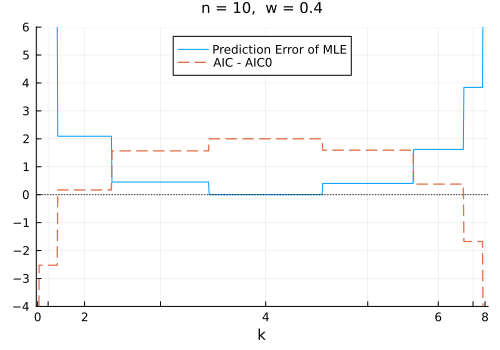

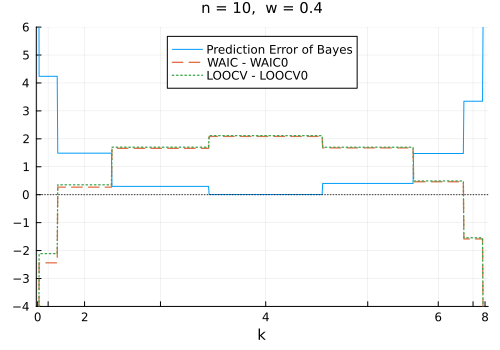

In [35]:
n = 10
w = 0.4
plot_AIC(n, w) |> display
plot_WAIC_LOOCV(n, w) |> display
pyplotclf()

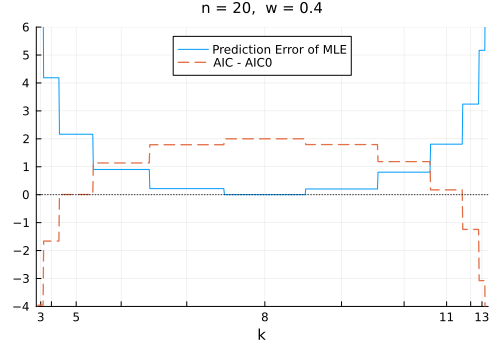

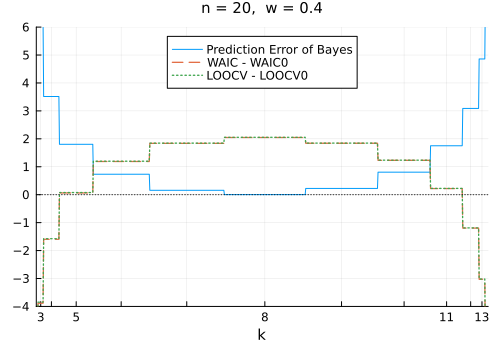

In [36]:
n = 20
w = 0.4
plot_AIC(n, w) |> display
plot_WAIC_LOOCV(n, w) |> display
pyplotclf()

In [37]:
n = 100
w = 0.4
@show n
@show w
q = Bernoulli(w)
prob_fail_AIC = E(q, n, k->AIC(n,k) < AIC0(q,n,k)) |> rd
@show prob_fail_AIC
println()
for k in sample_supp(q, n, 3)
    pred_error = PE(pred_MLE, q, n, k)
    AIC_minus_AIC0 = AIC(n,k) - AIC0(q,n,k)
    (
        k = k,
        prob = pdf(Binomial(n, q.p), k)|>rd, 
        PE_MLE = pred_error |>rd, 
        AIC_minus_AIC0 = AIC_minus_AIC0 |>rd, 
        PE_plus_AIC_minus_AIC0 = pred_error + AIC_minus_AIC0 |>rd
    ) |> println
end

n = 100
w = 0.4
prob_fail_AIC = 0.184

(k = 25, prob = 0.001, PE_MLE = 10.823, AIC_minus_AIC0 = -7.971, PE_plus_AIC_minus_AIC0 = 2.852)
(k = 26, prob = 0.001, PE_MLE = 9.296, AIC_minus_AIC0 = -6.638, PE_plus_AIC_minus_AIC0 = 2.658)
(k = 27, prob = 0.002, PE_MLE = 7.91, AIC_minus_AIC0 = -5.408, PE_plus_AIC_minus_AIC0 = 2.501)
(k = 28, prob = 0.004, PE_MLE = 6.655, AIC_minus_AIC0 = -4.281, PE_plus_AIC_minus_AIC0 = 2.375)
(k = 29, prob = 0.006, PE_MLE = 5.526, AIC_minus_AIC0 = -3.252, PE_plus_AIC_minus_AIC0 = 2.275)
(k = 30, prob = 0.01, PE_MLE = 4.516, AIC_minus_AIC0 = -2.32, PE_plus_AIC_minus_AIC0 = 2.196)
(k = 31, prob = 0.015, PE_MLE = 3.62, AIC_minus_AIC0 = -1.484, PE_plus_AIC_minus_AIC0 = 2.136)
(k = 32, prob = 0.022, PE_MLE = 2.832, AIC_minus_AIC0 = -0.741, PE_plus_AIC_minus_AIC0 = 2.091)
(k = 33, prob = 0.03, PE_MLE = 2.148, AIC_minus_AIC0 = -0.09, PE_plus_AIC_minus_AIC0 = 2.058)
(k = 34, prob = 0.039, PE_MLE = 1.564, AIC_minus_AIC0 = 0.47, PE_plus_AIC_minus_AIC0 = 2.035)
(k = 35,

In [38]:
n = 100
w = 0.4
@show n
@show w
q = Bernoulli(w)
prob_fail_WAIC = E(q, n, k -> WAIC(n,k) < WAIC0(q,n,k)) |> rd
@show prob_fail_WAIC
println()
for k in sample_supp(q, n, 3)
    pred_error = PE(pred_Bayes, q, n, k)
    WAIC_minus_WAIC0 = WAIC(n,k) - WAIC0(q,n,k)
    (
        k = k, 
        prob = pdf(Binomial(n, q.p), k)|>rd, 
        PE_Bayes = pred_error |>rd, 
        WAIC_minus_WAIC0 = WAIC_minus_WAIC0 |>rd, 
        PE_plus_WAIC_minus_WAIC0 = pred_error + WAIC_minus_WAIC0 |>rd
    ) |> println
end

n = 100
w = 0.4
prob_fail_WAIC = 0.155

(k = 25, prob = 0.001, PE_Bayes = 10.432, WAIC_minus_WAIC0 = -7.958, PE_plus_WAIC_minus_WAIC0 = 2.473)
(k = 26, prob = 0.001, PE_Bayes = 8.954, WAIC_minus_WAIC0 = -6.625, PE_plus_WAIC_minus_WAIC0 = 2.329)
(k = 27, prob = 0.002, PE_Bayes = 7.613, WAIC_minus_WAIC0 = -5.396, PE_plus_WAIC_minus_WAIC0 = 2.216)
(k = 28, prob = 0.004, PE_Bayes = 6.399, WAIC_minus_WAIC0 = -4.268, PE_plus_WAIC_minus_WAIC0 = 2.131)
(k = 29, prob = 0.006, PE_Bayes = 5.307, WAIC_minus_WAIC0 = -3.24, PE_plus_WAIC_minus_WAIC0 = 2.067)
(k = 30, prob = 0.01, PE_Bayes = 4.33, WAIC_minus_WAIC0 = -2.309, PE_plus_WAIC_minus_WAIC0 = 2.022)
(k = 31, prob = 0.015, PE_Bayes = 3.464, WAIC_minus_WAIC0 = -1.472, PE_plus_WAIC_minus_WAIC0 = 1.991)
(k = 32, prob = 0.022, PE_Bayes = 2.703, WAIC_minus_WAIC0 = -0.73, PE_plus_WAIC_minus_WAIC0 = 1.973)
(k = 33, prob = 0.03, PE_Bayes = 2.043, WAIC_minus_WAIC0 = -0.079, PE_plus_WAIC_minus_WAIC0 = 1.964)
(k = 34, prob = 0.039, PE_Bayes = 1.481, WAIC_

In [39]:
n = 100
w = 0.4
@show n
@show w
q = Bernoulli(w)
prob_fail_LOOCV = EE(q, n, k->LOOCV(n,k) < LOOCV0(q,n,k)) |> rd
@show prob_fail_LOOCV
println()
for k in sample_supp(q, n, 3)
    pred_error = PE(pred_Bayes, q, n, k)
    LOOCV_minus_LOOCV0 = LOOCV(n,k) - LOOCV0(q,n,k)
    (
        k = k, 
        prob = pdf(Binomial(n, q.p), k)|>rd, 
        PE_Bayes = pred_error |>rd, 
        LOOCV_minus_LOOCVC0 = LOOCV_minus_LOOCV0 |>rd, 
        PE_plus_LOOCV_minus_LOOCV0 = pred_error + LOOCV_minus_LOOCV0 |>rd
    ) |> println
end

n = 100
w = 0.4
prob_fail_LOOCV = 0.155

(k = 25, prob = 0.001, PE_Bayes = 10.432, LOOCV_minus_LOOCVC0 = -7.958, PE_plus_LOOCV_minus_LOOCV0 = 2.474)
(k = 26, prob = 0.001, PE_Bayes = 8.954, LOOCV_minus_LOOCVC0 = -6.625, PE_plus_LOOCV_minus_LOOCV0 = 2.33)
(k = 27, prob = 0.002, PE_Bayes = 7.613, LOOCV_minus_LOOCVC0 = -5.396, PE_plus_LOOCV_minus_LOOCV0 = 2.217)
(k = 28, prob = 0.004, PE_Bayes = 6.399, LOOCV_minus_LOOCVC0 = -4.268, PE_plus_LOOCV_minus_LOOCV0 = 2.131)
(k = 29, prob = 0.006, PE_Bayes = 5.307, LOOCV_minus_LOOCVC0 = -3.24, PE_plus_LOOCV_minus_LOOCV0 = 2.067)
(k = 30, prob = 0.01, PE_Bayes = 4.33, LOOCV_minus_LOOCVC0 = -2.308, PE_plus_LOOCV_minus_LOOCV0 = 2.022)
(k = 31, prob = 0.015, PE_Bayes = 3.464, LOOCV_minus_LOOCVC0 = -1.472, PE_plus_LOOCV_minus_LOOCV0 = 1.992)
(k = 32, prob = 0.022, PE_Bayes = 2.703, LOOCV_minus_LOOCVC0 = -0.729, PE_plus_LOOCV_minus_LOOCV0 = 1.973)
(k = 33, prob = 0.03, PE_Bayes = 2.043, LOOCV_minus_LOOCVC0 = -0.079, PE_plus_LOOCV_minus_LOOCV0 = 1.964)


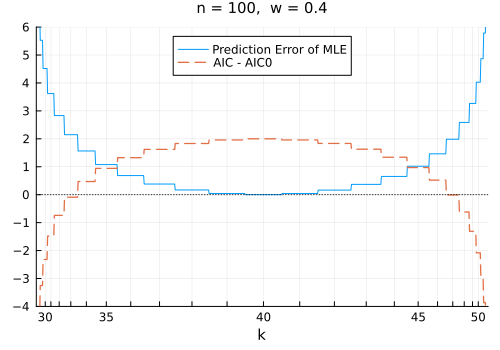

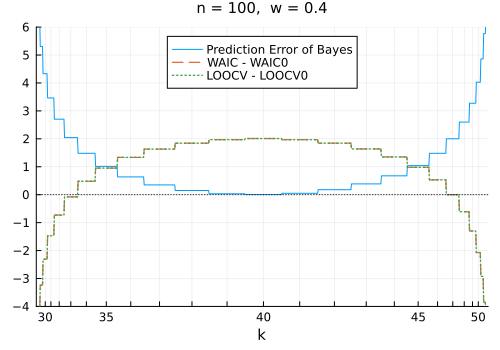

In [40]:
n = 100
w = 0.4
plot_AIC(n, w) |> display
plot_WAIC_LOOCV(n, w) |> display
pyplotclf()

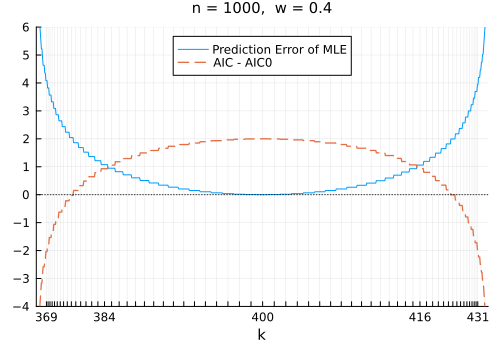

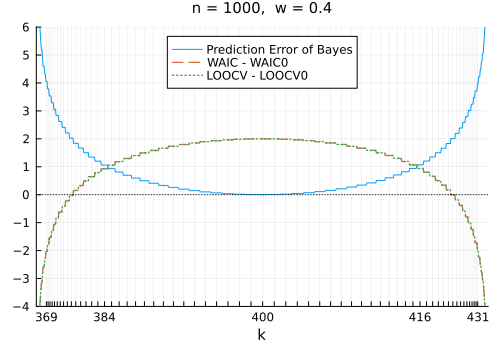

In [41]:
n = 1000
w = 0.4
plot_AIC(n, w) |> display
plot_WAIC_LOOCV(n, w) |> display
pyplotclf()

### AICとWAICとLOOCVによって正しいモデル選択に失敗する確率

In [42]:
w = 0.4
@show w
q = Bernoulli(w)
for n in round.(Int, 10 .^ (1:0.5:6))
    prob_fail_AIC = E(q, n, k -> AIC(n,k) < AIC0(q,n,k))
    (n=n, prob_fail_AIC=prob_fail_AIC|>x->rd(x,6)) |> println
end

w = 0.4
(n = 10, prob_fail_AIC = 0.101119)
(n = 32, prob_fail_AIC = 0.149451)
(n = 100, prob_fail_AIC = 0.184234)
(n = 316, prob_fail_AIC = 0.168147)
(n = 1000, prob_fail_AIC = 0.165153)
(n = 3162, prob_fail_AIC = 0.156863)
(n = 10000, prob_fail_AIC = 0.155993)
(n = 31623, prob_fail_AIC = 0.157987)
(n = 100000, prob_fail_AIC = 0.156522)
(n = 316228, prob_fail_AIC = 0.157407)
(n = 1000000, prob_fail_AIC = 0.157491)


In [43]:
w = 0.4
@show w
q = Bernoulli(w)
for n in round.(Int, 10 .^ (1:0.5:6))
    prob_fail_WAIC = E(q, n, k -> WAIC(n,k) < WAIC0(q,n,k))
    (n=n, prob_fail_WAIC=prob_fail_WAIC|>x->rd(x,6)) |> println
end

w = 0.4
(n = 10, prob_fail_WAIC = 0.101119)
(n = 32, prob_fail_WAIC = 0.149451)
(n = 100, prob_fail_WAIC = 0.155043)
(n = 316, prob_fail_WAIC = 0.168147)
(n = 1000, prob_fail_WAIC = 0.165153)
(n = 3162, prob_fail_WAIC = 0.156863)
(n = 10000, prob_fail_WAIC = 0.155993)
(n = 31623, prob_fail_WAIC = 0.157987)
(n = 100000, prob_fail_WAIC = 0.156522)
(n = 316228, prob_fail_WAIC = 0.157407)
(n = 1000000, prob_fail_WAIC = 0.157491)


In [44]:
w = 0.4
@show w
q = Bernoulli(w)
for n in round.(Int, 10 .^ (1:0.5:6))
    prob_fail_LOOCV = EE(q, n, k -> LOOCV(n,k) < LOOCV0(q,n,k))
    (n=n, prob_fail_LOOCV=prob_fail_LOOCV|>x->rd(x,6)) |> println
end

w = 0.4
(n = 10, prob_fail_LOOCV = 0.095556)
(n = 32, prob_fail_LOOCV = 0.149451)
(n = 100, prob_fail_LOOCV = 0.155043)
(n = 316, prob_fail_LOOCV = 0.168147)
(n = 1000, prob_fail_LOOCV = 0.165153)
(n = 3162, prob_fail_LOOCV = 0.156863)
(n = 10000, prob_fail_LOOCV = 0.155993)
(n = 31623, prob_fail_LOOCV = 0.157987)
(n = 100000, prob_fail_LOOCV = 0.156522)
(n = 316228, prob_fail_LOOCV = 0.157407)
(n = 1000000, prob_fail_LOOCV = 0.157491)


In [45]:
ccdf(Chisq(1), 2)|>x->rd(x,6)

0.157299

この場合には正しいモデル選択に失敗する確率は, 自由度1のχ²分布で2より大きくなる確率 0.157 に収束する.  対数尤度比検定との関係でこれは当然こうなるべきである.

## BICとWBICと自由エネルギー

In [46]:
bic(n, k) = T(n, k; a=0.0, b=0.0) + (1/2)*log(n)/n
bic0(q, n, k) = aic0(q, n, k)

BIC(n, k) = 2n*bic(n, k)
BIC0(q, n, k) = 2n*bic0(q, n, k)

function wbic(n, k; a=0.5, b=0.5)
    β = 1/log(n)
    p = k/n
    -p*digamma(β*k+a) - (1-p)*digamma(β*(n-k)+b) + digamma(β*n+a+b)
end
wbic0(q, n, k; a=0.5, b=0.5) = waic0(q, n, k; β=1.0, a=a, b=b)

WBIC(n, k; a=0.5, b=0.5) = 2n*wbic(n, k; a=a, b=b)
WBIC0(q, n, k; a=0.5, b=0.5) = 2n*wbic0(q, n, k; a=a, b=b)

FE(n, k; β=1.0, a=0.5, b=0.5) = (2/β)*(
    - (loggamma(a+k) - loggamma(a)) 
    - (loggamma(b+n-k) - loggamma(b))
    + (loggamma(a+b+n) - loggamma(a+b))
)
FE0(q, n, k; β=1.0) = (2/β)*(- safemul(k, log(q.p)) - safemul(n-k, log(1-q.p)))

FE0 (generic function with 1 method)

### BICとWBICと自由エネルギーの関係

In [47]:
function plot_BIC_WBIC_FE(n, w;
        legend = :bottom,
        ylim = (-4, 6),
        ytick = ylim[1]:ylim[2]
    )

    q = Bernoulli(w)
    q_sample = Binomial(n, q.p)

    x = range(0, 1, length=801)
    k = quantile.(q_sample, x)
    xtick, xticklabel = make_xtick(n, w)
    
    FE_minus_FE0 = @. FE(n,k) - FE0(q,n,k)
    BIC_minus_BIC0 = @. BIC(n,k) - BIC0(q,n,k)
    WBIC_minus_WBIC0 = @. WBIC(n,k) - WBIC0(q,n,k)
    
    P = plot(title="n = $n,  w = $w"; titlefontsize=10)
    plot!(xlim=(0, 1), ylim=ylim)
    plot!(xtick=(xtick, xticklabel), ytick=ytick)
    plot!(xlabel="k", guidefontsize=10)
    plot!(legend=legend)
    plot!(x, FE_minus_FE0; label="FE - FE0")
    plot!(x, WBIC_minus_WBIC0; label="WBIC - WBIC0", ls=:dash, lw=1.2)
    plot!(x, BIC_minus_BIC0; label="BIC - BIC0", ls=:dot, lw=1.5)
    hline!([0]; color=:black, ls=:dot, alpha=0.8, label="")
    
    plot(P; size=(500, 350))
end

plot_BIC_WBIC_FE (generic function with 1 method)

In [48]:
n = 10
w = 0.4
q = Bernoulli(w)
@show n
@show w
for k in sample_supp(q, n, 3)
    (
        k=k, 
        prob=pdf(Binomial(n, q.p), k)|>rd, 
        FE0=FE0(q,n,k)|>rd, 
        BIC0=BIC0(q,n,k)|>rd, 
        WBIC0=WBIC0(q,n,k)|>rd, 
    ) |> println
end

n = 10
w = 0.4
(k = 0, prob = 0.006, FE0 = 10.217, BIC0 = 10.217, WBIC0 = 10.217)
(k = 1, prob = 0.04, FE0 = 11.027, BIC0 = 11.027, WBIC0 = 11.027)
(k = 2, prob = 0.121, FE0 = 11.838, BIC0 = 11.838, WBIC0 = 11.838)
(k = 3, prob = 0.215, FE0 = 12.649, BIC0 = 12.649, WBIC0 = 12.649)
(k = 4, prob = 0.251, FE0 = 13.46, BIC0 = 13.46, WBIC0 = 13.46)
(k = 5, prob = 0.201, FE0 = 14.271, BIC0 = 14.271, WBIC0 = 14.271)
(k = 6, prob = 0.111, FE0 = 15.082, BIC0 = 15.082, WBIC0 = 15.082)
(k = 7, prob = 0.042, FE0 = 15.893, BIC0 = 15.893, WBIC0 = 15.893)
(k = 8, prob = 0.011, FE0 = 16.704, BIC0 = 16.704, WBIC0 = 16.704)
(k = 9, prob = 0.002, FE0 = 17.515, BIC0 = 17.515, WBIC0 = 17.515)


n = 10
w = 0.4
(k = 0, prob = 0.006, FE_minus_FE0 = -6.744, BIC_minus_FE0 = -7.914, WBIC_minus_FE0 = -8.046)
(k = 1, prob = 0.0403, FE_minus_FE0 = -1.666, BIC_minus_FE0 = -2.223, WBIC_minus_FE0 = -2.646)
(k = 2, prob = 0.1209, FE_minus_FE0 = 0.992, BIC_minus_FE0 = 0.472, WBIC_minus_FE0 = 0.143)
(k = 3, prob = 0.215, FE_minus_FE0 = 2.378, BIC_minus_FE0 = 1.871, WBIC_minus_FE0 = 1.585)
(k = 4, prob = 0.2508, FE_minus_FE0 = 2.805, BIC_minus_FE0 = 2.303, WBIC_minus_FE0 = 2.038)
(k = 5, prob = 0.2007, FE_minus_FE0 = 2.396, BIC_minus_FE0 = 1.894, WBIC_minus_FE0 = 1.636)
(k = 6, prob = 0.1115, FE_minus_FE0 = 1.184, BIC_minus_FE0 = 0.681, WBIC_minus_FE0 = 0.416)
(k = 7, prob = 0.0425, FE_minus_FE0 = -0.865, BIC_minus_FE0 = -1.373, WBIC_minus_FE0 = -1.658)
(k = 8, prob = 0.0106, FE_minus_FE0 = -3.874, BIC_minus_FE0 = -4.393, WBIC_minus_FE0 = -4.723)
(k = 9, prob = 0.0016, FE_minus_FE0 = -8.154, BIC_minus_FE0 = -8.711, WBIC_minus_FE0 = -9.134)


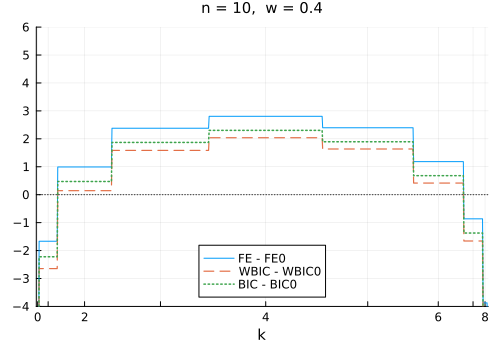

In [49]:
n = 10
w = 0.4
q = Bernoulli(w)
@show n
@show w
for k in sample_supp(q, n, 3)
    F0 = FE0(q,n,k)
    (
        k=k, 
        prob=pdf(Binomial(n, q.p), k)|>x->rd(x,4), 
        FE_minus_FE0=FE(n,k)-F0|>rd, 
        BIC_minus_FE0=BIC(n,k)-F0|>rd,
        WBIC_minus_FE0=WBIC(n,k)-F0|>rd
    ) |> println
end

plot_BIC_WBIC_FE(n, w)

n = 20
w = 0.4
(k = 1, prob = 0.0005, FE_minus_FE0 = -9.764, BIC_minus_FE0 = -10.308, WBIC_minus_FE0 = -10.836)
(k = 2, prob = 0.0031, FE_minus_FE0 = -5.55, BIC_minus_FE0 = -6.056, WBIC_minus_FE0 = -6.464)
(k = 3, prob = 0.0123, FE_minus_FE0 = -2.469, BIC_minus_FE0 = -2.962, WBIC_minus_FE0 = -3.298)
(k = 4, prob = 0.035, FE_minus_FE0 = -0.179, BIC_minus_FE0 = -0.665, WBIC_minus_FE0 = -0.958)
(k = 5, prob = 0.0746, FE_minus_FE0 = 1.484, BIC_minus_FE0 = 1.001, WBIC_minus_FE0 = 0.736)
(k = 6, prob = 0.1244, FE_minus_FE0 = 2.611, BIC_minus_FE0 = 2.132, WBIC_minus_FE0 = 1.884)
(k = 7, prob = 0.1659, FE_minus_FE0 = 3.262, BIC_minus_FE0 = 2.784, WBIC_minus_FE0 = 2.549)
(k = 8, prob = 0.1797, FE_minus_FE0 = 3.473, BIC_minus_FE0 = 2.996, WBIC_minus_FE0 = 2.768)
(k = 9, prob = 0.1597, FE_minus_FE0 = 3.267, BIC_minus_FE0 = 2.79, WBIC_minus_FE0 = 2.567)
(k = 10, prob = 0.1171, FE_minus_FE0 = 2.656, BIC_minus_FE0 = 2.179, WBIC_minus_FE0 = 1.957)
(k = 11, prob = 0.071, FE_minus_FE0 = 1.645, BIC_minu

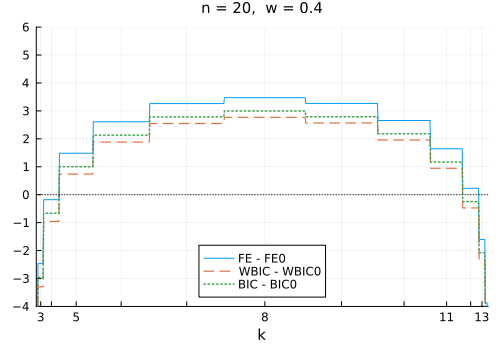

In [50]:
n = 20
w = 0.4
q = Bernoulli(w)
@show n
@show w
for k in sample_supp(q, n, 3)
    F0 = FE0(q,n,k)
    (
        k=k, 
        prob=pdf(Binomial(n, q.p), k)|>x->rd(x,4), 
        FE_minus_FE0=FE(n,k)-F0|>rd, 
        BIC_minus_FE0=BIC(n,k)-F0|>rd,
        WBIC_minus_FE0=WBIC(n,k)-F0|>rd
    ) |> println
end

plot_BIC_WBIC_FE(n, w)

n = 50
w = 0.4
(k = 9, prob = 0.0005, FE_minus_FE0 = -6.863, BIC_minus_FE0 = -7.33, WBIC_minus_FE0 = -7.549)
(k = 10, prob = 0.0014, FE_minus_FE0 = -4.774, BIC_minus_FE0 = -5.24, WBIC_minus_FE0 = -5.447)
(k = 11, prob = 0.0035, FE_minus_FE0 = -2.935, BIC_minus_FE0 = -3.4, WBIC_minus_FE0 = -3.597)
(k = 12, prob = 0.0076, FE_minus_FE0 = -1.33, BIC_minus_FE0 = -1.794, WBIC_minus_FE0 = -1.983)
(k = 13, prob = 0.0147, FE_minus_FE0 = 0.057, BIC_minus_FE0 = -0.407, WBIC_minus_FE0 = -0.589)
(k = 14, prob = 0.026, FE_minus_FE0 = 1.235, BIC_minus_FE0 = 0.772, WBIC_minus_FE0 = 0.596)
(k = 15, prob = 0.0415, FE_minus_FE0 = 2.215, BIC_minus_FE0 = 1.752, WBIC_minus_FE0 = 1.581)
(k = 16, prob = 0.0606, FE_minus_FE0 = 3.004, BIC_minus_FE0 = 2.542, WBIC_minus_FE0 = 2.374)
(k = 17, prob = 0.0808, FE_minus_FE0 = 3.61, BIC_minus_FE0 = 3.147, WBIC_minus_FE0 = 2.983)
(k = 18, prob = 0.0987, FE_minus_FE0 = 4.037, BIC_minus_FE0 = 3.575, WBIC_minus_FE0 = 3.414)
(k = 19, prob = 0.1109, FE_minus_FE0 = 4.29, BIC_

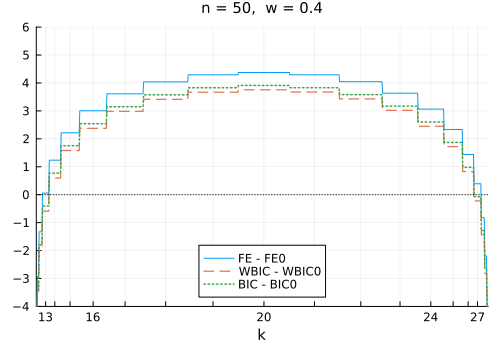

In [51]:
n = 50
w = 0.4
q = Bernoulli(w)
@show n
@show w
for k in sample_supp(q, n, 3)
    F0 = FE0(q,n,k)
    (
        k=k, 
        prob=pdf(Binomial(n, q.p), k)|>x->rd(x,4), 
        FE_minus_FE0=FE(n,k)-F0|>rd, 
        BIC_minus_FE0=BIC(n,k)-F0|>rd,
        WBIC_minus_FE0=WBIC(n,k)-F0|>rd
    ) |> println
end

plot_BIC_WBIC_FE(n, w)

n = 100
w = 0.4
(k = 25, prob = 0.0006, FE_minus_FE0 = -4.908, BIC_minus_FE0 = -5.366, WBIC_minus_FE0 = -5.495)
(k = 26, prob = 0.0012, FE_minus_FE0 = -3.575, BIC_minus_FE0 = -4.033, WBIC_minus_FE0 = -4.16)
(k = 27, prob = 0.0022, FE_minus_FE0 = -2.346, BIC_minus_FE0 = -2.803, WBIC_minus_FE0 = -2.928)
(k = 28, prob = 0.0038, FE_minus_FE0 = -1.218, BIC_minus_FE0 = -1.675, WBIC_minus_FE0 = -1.798)
(k = 29, prob = 0.0063, FE_minus_FE0 = -0.189, BIC_minus_FE0 = -0.647, WBIC_minus_FE0 = -0.767)
(k = 30, prob = 0.01, FE_minus_FE0 = 0.742, BIC_minus_FE0 = 0.285, WBIC_minus_FE0 = 0.166)
(k = 31, prob = 0.0151, FE_minus_FE0 = 1.578, BIC_minus_FE0 = 1.121, WBIC_minus_FE0 = 1.004)
(k = 32, prob = 0.0217, FE_minus_FE0 = 2.321, BIC_minus_FE0 = 1.864, WBIC_minus_FE0 = 1.748)
(k = 33, prob = 0.0297, FE_minus_FE0 = 2.972, BIC_minus_FE0 = 2.515, WBIC_minus_FE0 = 2.4)
(k = 34, prob = 0.0391, FE_minus_FE0 = 3.532, BIC_minus_FE0 = 3.076, WBIC_minus_FE0 = 2.962)
(k = 35, prob = 0.0491, FE_minus_FE0 = 4.004

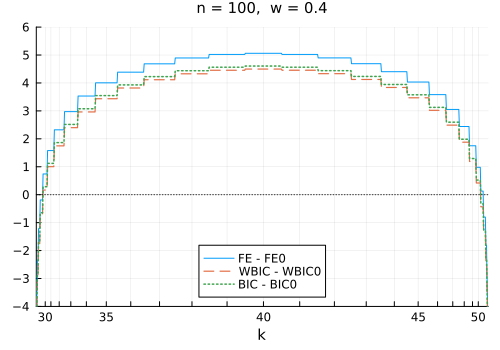

In [52]:
n = 100
w = 0.4
q = Bernoulli(w)
@show n
@show w
for k in sample_supp(q, n, 3)
    F0 = FE0(q,n,k)
    (
        k=k, 
        prob=pdf(Binomial(n, q.p), k)|>x->rd(x,4), 
        FE_minus_FE0=FE(n,k)-F0|>rd, 
        BIC_minus_FE0=BIC(n,k)-F0|>rd,
        WBIC_minus_FE0=WBIC(n,k)-F0|>rd
    ) |> println
end

plot_BIC_WBIC_FE(n, w)

n = 1000
w = 0.4
(k = 353, prob = 0.0002, FE_minus_FE0 = -1.982, BIC_minus_FE0 = -2.434, WBIC_minus_FE0 = -2.459)
(k = 354, prob = 0.0003, FE_minus_FE0 = -1.585, BIC_minus_FE0 = -2.037, WBIC_minus_FE0 = -2.063)
(k = 355, prob = 0.0004, FE_minus_FE0 = -1.198, BIC_minus_FE0 = -1.65, WBIC_minus_FE0 = -1.675)
(k = 356, prob = 0.0004, FE_minus_FE0 = -0.819, BIC_minus_FE0 = -1.271, WBIC_minus_FE0 = -1.296)
(k = 357, prob = 0.0005, FE_minus_FE0 = -0.448, BIC_minus_FE0 = -0.9, WBIC_minus_FE0 = -0.926)
(k = 358, prob = 0.0006, FE_minus_FE0 = -0.087, BIC_minus_FE0 = -0.539, WBIC_minus_FE0 = -0.564)
(k = 359, prob = 0.0008, FE_minus_FE0 = 0.266, BIC_minus_FE0 = -0.186, WBIC_minus_FE0 = -0.211)
(k = 360, prob = 0.0009, FE_minus_FE0 = 0.61, BIC_minus_FE0 = 0.158, WBIC_minus_FE0 = 0.133)
(k = 361, prob = 0.0011, FE_minus_FE0 = 0.946, BIC_minus_FE0 = 0.493, WBIC_minus_FE0 = 0.468)
(k = 362, prob = 0.0013, FE_minus_FE0 = 1.272, BIC_minus_FE0 = 0.82, WBIC_minus_FE0 = 0.795)
(k = 363, prob = 0.0015, FE_

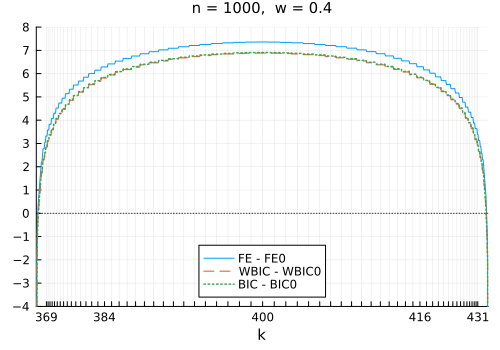

In [53]:
n = 1000
w = 0.4
q = Bernoulli(w)
@show n
@show w
for k in sample_supp(q, n, 3)
    F0 = FE0(q,n,k)
    (
        k=k, 
        prob=pdf(Binomial(n, q.p), k)|>x->rd(x,4), 
        FE_minus_FE0=FE(n,k)-F0|>rd, 
        BIC_minus_FE0=BIC(n,k)-F0|>rd,
        WBIC_minus_FE0=WBIC(n,k)-F0|>rd
    ) |> println
end

plot_BIC_WBIC_FE(n, w; ylim=(-4, 8))

### BICとWBICと自由エネルギーによって正しいモデル選択に失敗する確率

In [54]:
w = 0.4
@show w
q = Bernoulli(w)
for n in round.(Int, 10 .^ (1:0.5:6))
    prob_fail_BIC = E(q, n, k -> BIC(n,k) < BIC0(q,n,k))
    (n=n, prob_fail_BIC=prob_fail_BIC|>x->rd(x,6)) |> println
end

w = 0.4
(n = 10, prob_fail_BIC = 0.101119)
(n = 32, prob_fail_BIC = 0.045704)
(n = 100, prob_fail_BIC = 0.031537)
(n = 316, prob_fail_BIC = 0.015748)
(n = 1000, prob_fail_BIC = 0.008909)
(n = 3162, prob_fail_BIC = 0.00437)
(n = 10000, prob_fail_BIC = 0.002434)
(n = 31623, prob_fail_BIC = 0.001308)
(n = 100000, prob_fail_BIC = 0.000685)
(n = 316228, prob_fail_BIC = 0.000375)
(n = 1000000, prob_fail_BIC = 0.000202)


In [55]:
w = 0.4
@show w
q = Bernoulli(w)
for n in round.(Int, 10 .^ (1:0.5:6))
    prob_fail_WBIC = E(q, n, k -> WBIC(n,k) < WBIC0(q,n,k))
    (n=n, prob_fail_WBIC=prob_fail_WBIC|>x->rd(x,6)) |> println
end

w = 0.4
(n = 10, prob_fail_WBIC = 0.101119)
(n = 32, prob_fail_WBIC = 0.071091)
(n = 100, prob_fail_WBIC = 0.031537)
(n = 316, prob_fail_WBIC = 0.015748)
(n = 1000, prob_fail_WBIC = 0.008909)
(n = 3162, prob_fail_WBIC = 0.00437)
(n = 10000, prob_fail_WBIC = 0.002434)
(n = 31623, prob_fail_WBIC = 0.001308)
(n = 100000, prob_fail_WBIC = 0.000685)
(n = 316228, prob_fail_WBIC = 0.000375)
(n = 1000000, prob_fail_WBIC = 0.000202)


In [56]:
w = 0.4
@show w
q = Bernoulli(w)
for n in round.(Int, 10 .^ (1:0.5:6))
    prob_fail_FE = E(q, n, k -> FE(n,k) < FE0(q,n,k))
    (n=n, prob_fail_FE=prob_fail_FE|>x->rd(x,6)) |> println
end

w = 0.4
(n = 10, prob_fail_FE = 0.101119)
(n = 32, prob_fail_FE = 0.045704)
(n = 100, prob_fail_FE = 0.02478)
(n = 316, prob_fail_FE = 0.011404)
(n = 1000, prob_fail_FE = 0.00669)
(n = 3162, prob_fail_FE = 0.003469)
(n = 10000, prob_fail_FE = 0.001917)
(n = 31623, prob_fail_FE = 0.001007)
(n = 100000, prob_fail_FE = 0.00054)
(n = 316228, prob_fail_FE = 0.000292)
(n = 1000000, prob_fail_FE = 0.000159)


## ベイズ統計と仮説検定や信頼区間との関係

In [57]:
# ジェネリックな信頼区間函数

is_in(x, CI) = CI[1] ≤ x ≤ CI[2]

function conf_int(pval_func, n, k; α=0.05)
    f(w) = pval_func(Bernoulli(w), n, k) - α
    CI = find_zeros(f, 0, 1)
    if k == 0
        [0.0, CI[1]]
    elseif k == n
        [CI[1], 1.0]
    else
        CI
    end
end

conf_int (generic function with 1 method)

### P値函数およびその類似物の定義

P値函数が定義されれば自動的に信頼区間も定義される.

In [58]:
# 二項分布の正規分布近似による仮説検定のP値

function pval_normal(q, n, k)
    q_sample = Binomial(n, q.p)
    μ = mean(q_sample)
    σ = std(q_sample)
    z = (k - μ)/σ
    2ccdf(Normal(), abs(z))
end

n = 10
[(k=k, conf_int=conf_int(pval_normal, n, k).|>rd) for k in 0:n]

11-element Vector{@NamedTuple{k::Int64, conf_int::Vector{Float64}}}:
 (k = 0, conf_int = [0.0, 0.278])
 (k = 1, conf_int = [0.018, 0.404])
 (k = 2, conf_int = [0.057, 0.51])
 (k = 3, conf_int = [0.108, 0.603])
 (k = 4, conf_int = [0.168, 0.687])
 (k = 5, conf_int = [0.237, 0.763])
 (k = 6, conf_int = [0.313, 0.832])
 (k = 7, conf_int = [0.397, 0.892])
 (k = 8, conf_int = [0.49, 0.943])
 (k = 9, conf_int = [0.596, 0.982])
 (k = 10, conf_int = [0.722, 1.0])

In [59]:
# ベイズ信用区間

post_dist(n, k; a=0.5, b=0.5) = Beta(a+k, b+n-k)

cred_int(n, k; a=0.5, b=0.5, α=0.05) = quantile.(post_dist(n, k; a=a, b=b), [α/2, 1-α/2])

n = 10
[(k=k, cred_int=cred_int(n, k).|>rd) for k in 0:n]

11-element Vector{@NamedTuple{k::Int64, cred_int::Vector{Float64}}}:
 (k = 0, cred_int = [0.0, 0.217])
 (k = 1, cred_int = [0.011, 0.381])
 (k = 2, cred_int = [0.044, 0.503])
 (k = 3, cred_int = [0.093, 0.606])
 (k = 4, cred_int = [0.153, 0.696])
 (k = 5, cred_int = [0.224, 0.776])
 (k = 6, cred_int = [0.304, 0.847])
 (k = 7, cred_int = [0.394, 0.907])
 (k = 8, cred_int = [0.497, 0.956])
 (k = 9, cred_int = [0.619, 0.989])
 (k = 10, cred_int = [0.783, 1.0])

In [60]:
# ベイズ信用区間の別の実装

# 以下の函数は事後分布を使ったP値の類似物
function pval_post(q, n, k; a=0.5, b=0.5)
    d = post_dist(n, k; a=a, b=b)
    min(2cdf(d, q.p), 2ccdf(d, q.p), 1)
end

# 上の計算結果と一致する
n = 10
[(k=k, conf_int=conf_int(pval_post, n, k).|>rd) for k in 0:n]

11-element Vector{@NamedTuple{k::Int64, conf_int::Vector{Float64}}}:
 (k = 0, conf_int = [0.0, 0.0])
 (k = 1, conf_int = [0.011, 0.381])
 (k = 2, conf_int = [0.044, 0.503])
 (k = 3, conf_int = [0.093, 0.606])
 (k = 4, conf_int = [0.153, 0.696])
 (k = 5, conf_int = [0.224, 0.776])
 (k = 6, conf_int = [0.304, 0.847])
 (k = 7, conf_int = [0.394, 0.907])
 (k = 8, conf_int = [0.497, 0.956])
 (k = 9, conf_int = [0.619, 0.989])
 (k = 10, conf_int = [0.783, 1.0])

In [61]:
# AICを使ったP値の類似物 (対数尤度比のχ²検定のP値)

function pval_AIC(q, n, k)
    x = AIC0(q, n, k) - (AIC(n, k) - 2)
    ccdf(Chisq(1), x)
end

n = 10
[(k=k, conf_int=conf_int(pval_AIC, n, k).|>rd) for k in 0:n]

11-element Vector{@NamedTuple{k::Int64, conf_int::Vector{Float64}}}:
 (k = 0, conf_int = [0.0, 0.175])
 (k = 1, conf_int = [0.006, 0.372])
 (k = 2, conf_int = [0.036, 0.499])
 (k = 3, conf_int = [0.085, 0.607])
 (k = 4, conf_int = [0.146, 0.7])
 (k = 5, conf_int = [0.218, 0.782])
 (k = 6, conf_int = [0.3, 0.854])
 (k = 7, conf_int = [0.393, 0.915])
 (k = 8, conf_int = [0.501, 0.964])
 (k = 9, conf_int = [0.628, 0.994])
 (k = 10, conf_int = [0.825, 1.0])

In [62]:
# WAICを使ったP値の類似物

function pval_WAIC(q, n, k; a=0.5, b=0.5)
    #x = WAIC0(q, n, k; a=a, b=b) - (WAIC(n, k; a=a, b=b) - 2)
    x = WAIC0(q, n, k; a=a, b=b) - 2n*T(n, k; a=a, b=b)
    ccdf(Chisq(1), x)
end

n = 10
[(k=k, conf_int=conf_int(pval_WAIC, n, k).|>rd) for k in 0:n]

11-element Vector{@NamedTuple{k::Int64, conf_int::Vector{Float64}}}:
 (k = 0, conf_int = [0.0, 0.212])
 (k = 1, conf_int = [0.006, 0.377])
 (k = 2, conf_int = [0.036, 0.501])
 (k = 3, conf_int = [0.084, 0.607])
 (k = 4, conf_int = [0.146, 0.7])
 (k = 5, conf_int = [0.218, 0.782])
 (k = 6, conf_int = [0.3, 0.854])
 (k = 7, conf_int = [0.393, 0.916])
 (k = 8, conf_int = [0.499, 0.964])
 (k = 9, conf_int = [0.623, 0.994])
 (k = 10, conf_int = [0.788, 1.0])

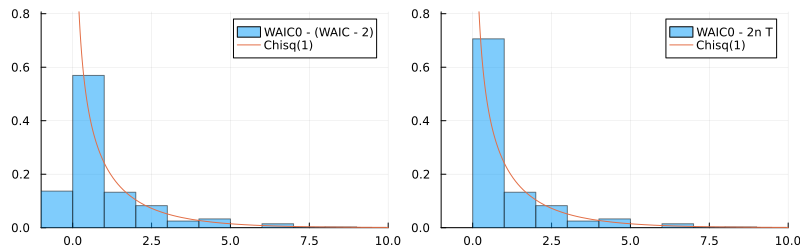

In [63]:
n = 40
w = 0.29
q = Bernoulli(w)
sample = rand(Binomial(n, q.p), 10^5)
y1 = WAIC0.(q, n, sample) - WAIC.(n, sample) .+ 2
y2 = WAIC0.(q, n, sample) - 2n*T.(n, sample)
P1 = histogram(y1, xlim=(-1, 10), bin=-1:1:10, alpha=0.5, norm=true, label="WAIC0 - (WAIC - 2)")
plot!(x->pdf(Chisq(1),x), 0.2, 10; label="Chisq(1)")
P2 = histogram(y2, xlim=(-1, 10), bin=-1:1:10, alpha=0.5, norm=true, label="WAIC0 - 2n T")
plot!(x->pdf(Chisq(1),x), 0.2, 10; label="Chisq(1)")
plot(P1, P2, size=(800, 250))

In [64]:
n = 100
w = 0.3
q = Bernoulli(w)
@show n
@show w
[(k=k, pval_normal=pval_normal(q, n, k)|>rd, pval_post=pval_post(q, n, k)|>rd, pval_AIC=pval_AIC(q, n, k)|>rd, pval_WAIC=pval_WAIC(q, n, k)|>rd) for k in sample_supp(q, n, 3)]

n = 100
w = 0.3


29-element Vector{@NamedTuple{k::Int64, pval_normal::Float64, pval_post::Float64, pval_AIC::Float64, pval_WAIC::Float64}}:
 (k = 16, pval_normal = 0.002, pval_post = 0.001, pval_AIC = 0.001, pval_WAIC = 0.001)
 (k = 17, pval_normal = 0.005, pval_post = 0.003, pval_AIC = 0.003, pval_WAIC = 0.003)
 (k = 18, pval_normal = 0.009, pval_post = 0.006, pval_AIC = 0.006, pval_WAIC = 0.006)
 (k = 19, pval_normal = 0.016, pval_post = 0.013, pval_AIC = 0.012, pval_WAIC = 0.012)
 (k = 20, pval_normal = 0.029, pval_post = 0.024, pval_AIC = 0.023, pval_WAIC = 0.023)
 (k = 21, pval_normal = 0.05, pval_post = 0.044, pval_AIC = 0.042, pval_WAIC = 0.042)
 (k = 22, pval_normal = 0.081, pval_post = 0.075, pval_AIC = 0.072, pval_WAIC = 0.072)
 (k = 23, pval_normal = 0.127, pval_post = 0.121, pval_AIC = 0.117, pval_WAIC = 0.117)
 (k = 24, pval_normal = 0.19, pval_post = 0.186, pval_AIC = 0.181, pval_WAIC = 0.181)
 (k = 25, pval_normal = 0.275, pval_post = 0.274, pval_AIC = 0.267, pval_WAIC = 0.267)
 (k = 26,

In [65]:
n = 30
[
    (
        k=k, 
        Normal=conf_int(pval_normal, n, k).|>rd, 
        Bayes=cred_int(n, k).|>rd, 
        AIC=conf_int(pval_AIC, n, k).|>rd, 
        WAIC=conf_int(pval_WAIC, n, k).|>rd
    ) for k in 0:n
]

31-element Vector{@NamedTuple{k::Int64, Normal::Vector{Float64}, Bayes::Vector{Float64}, AIC::Vector{Float64}, WAIC::Vector{Float64}}}:
 (k = 0, Normal = [0.0, 0.114], Bayes = [0.0, 0.08], AIC = [0.0, 0.062], WAIC = [0.0, 0.077])
 (k = 1, Normal = [0.006, 0.167], Bayes = [0.004, 0.145], AIC = [0.002, 0.139], WAIC = [0.002, 0.142])
 (k = 2, Normal = [0.018, 0.213], Bayes = [0.014, 0.197], AIC = [0.011, 0.192], WAIC = [0.011, 0.194])
 (k = 3, Normal = [0.035, 0.256], Bayes = [0.029, 0.243], AIC = [0.026, 0.239], WAIC = [0.026, 0.24])
 (k = 4, Normal = [0.053, 0.297], Bayes = [0.047, 0.287], AIC = [0.043, 0.283], WAIC = [0.043, 0.284])
 (k = 5, Normal = [0.073, 0.336], Bayes = [0.067, 0.327], AIC = [0.063, 0.325], WAIC = [0.063, 0.325])
 (k = 6, Normal = [0.095, 0.373], Bayes = [0.088, 0.367], AIC = [0.085, 0.364], WAIC = [0.085, 0.365])
 (k = 7, Normal = [0.118, 0.409], Bayes = [0.111, 0.404], AIC = [0.108, 0.403], WAIC = [0.108, 0.403])
 (k = 8, Normal = [0.142, 0.444], Bayes = [0.135, 

### P値函数のアニメーション

In [66]:
function animate_pvalue_fuctions(n; fps=n/10, f=fill(true,4), pal=palette(:default))
    anim = @animate for k in 0:n
        w = 0.01:0.01:0.99
        y_normal = pval_normal.(Bernoulli.(w), n, k)
        y_Bayes  = pval_post.(Bernoulli.(w), n, k)
        y_AIC    = pval_AIC.(Bernoulli.(w), n, k)
        y_WAIC   = pval_WAIC.(Bernoulli.(w), n, k)
        P = plot(title="p-value functions for n=$n, k=" * @sprintf("%03d",k), titlefontsize=10)
        plot!(ylim=(-0.02, 1.02))
        plot!(xtick=0:0.1:1, ytick=0:0.1:1)
        f[1] && plot!(w, y_normal; label="Normal", ls=:solid, color=pal[1])
        f[2] && plot!(w, y_Bayes; label="Posterior", ls=:dash, color=pal[2])
        f[3] && plot!(w, y_AIC; label="AIC", ls=:dashdot, color=pal[3])
        f[4] && plot!(w, y_WAIC; label="WAIC", ls=:dot, lw=1.3, color=pal[4])
        plot(P; size=(500, 350))
    end
    pyplotclf()

    g = Int.(f)
    gifname = "pvalue_functions_$(n)_$(g[1])$(g[2])$(g[3])$(g[4]).gif"
    gif(anim, gifname; fps=fps)
    displayfile("image/gif", gifname)
end

animate_pvalue_fuctions (generic function with 1 method)

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_10_1111.gif



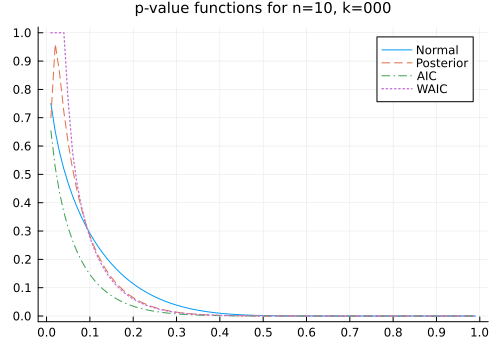

  1.354972 seconds (909.41 k allocations: 61.387 MiB, 0.91% gc time, 37.34% compilation time)


In [67]:
@time animate_pvalue_fuctions(10)

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_20_1111.gif



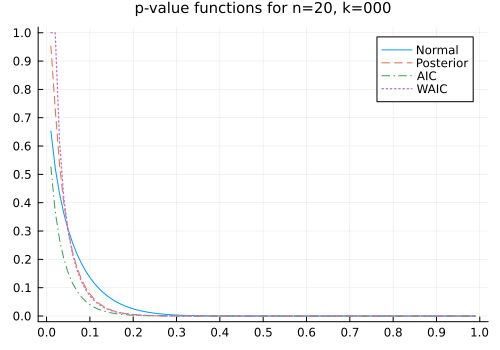

  0.825564 seconds (374.69 k allocations: 20.987 MiB)


In [68]:
@time animate_pvalue_fuctions(20)

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_50_1111.gif



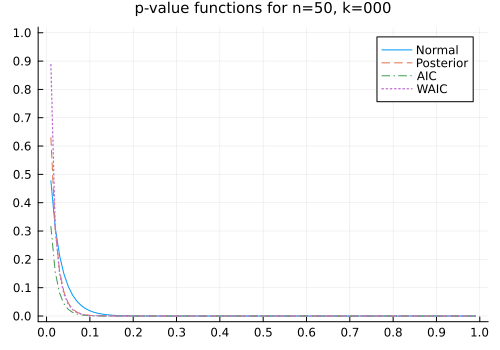

  1.721782 seconds (910.98 k allocations: 50.353 MiB, 0.86% gc time)


In [69]:
@time animate_pvalue_fuctions(50)

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_100_1111.gif



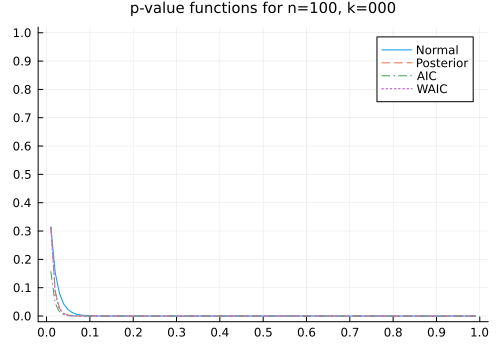

  3.471353 seconds (1.81 M allocations: 99.374 MiB, 5.77% gc time)


In [70]:
@time animate_pvalue_fuctions(100)

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_10_1100.gif



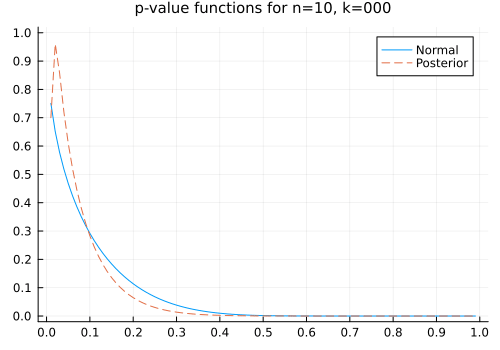

  0.450927 seconds (135.15 k allocations: 9.290 MiB)


In [71]:
@time animate_pvalue_fuctions(10; f=[true, true, false, false])

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_20_1100.gif



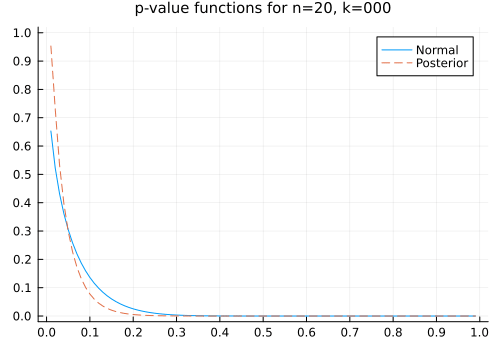

  0.776107 seconds (257.74 k allocations: 17.621 MiB)


In [72]:
@time animate_pvalue_fuctions(20; f=[true, true, false, false])

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_50_1100.gif



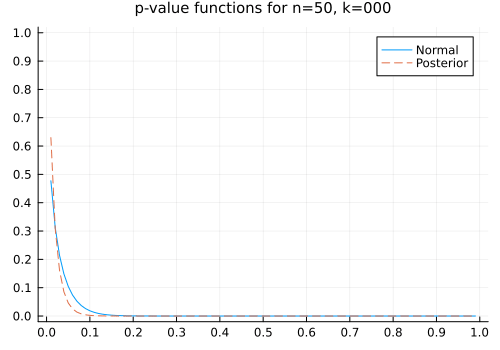

  1.619752 seconds (625.91 k allocations: 42.243 MiB)


In [73]:
@time animate_pvalue_fuctions(50; f=[true, true, false, false])

[ Info: Saved animation to D:\OneDrive\public\0050\pvalue_functions_100_1100.gif



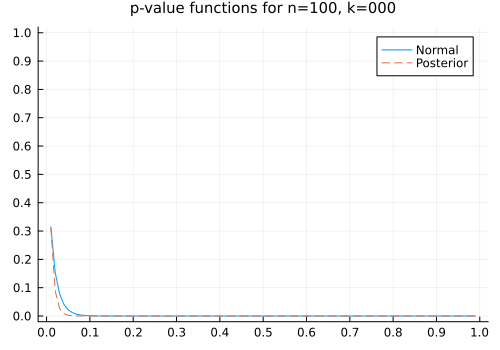

  3.094315 seconds (1.24 M allocations: 83.449 MiB, 0.19% gc time)


In [74]:
@time animate_pvalue_fuctions(100; f=[true, true, false, false])